In [1]:
import tracemalloc

from utils_v1 import *
import traceback


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential
from src.backend.Logger import Logger


In [3]:
site = 'PA'
mode = 'mcd'
training = False
inferring = True
print("Mode: {}. Site: {}. Training: {}".format(mode, site, training))


Mode: mcd. Site: PA. Training: False


In [4]:
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


#dates = [2018, 2019]

if site == 'PA':
	dates = [2017, 2018]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)


	if mode == 'evidential':	
		#exp_id_base = 148
		# exp_id_base = 155
		exp_id_base = 194
		exp_id_base = 198
		exp_id_base = 214

		# earlier date
		exp_id_base = 224
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

else:
	dates = [2018, 2019]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	if mode == 'evidential':	

		# MT
		# exp_id_base = 196
		# early date
		exp_id_base = 206
		# early date inference
		exp_id_base = 210
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2017, 2018]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
config = {
    "training": training,
    "learning_rate": 1e-4,
    "weights": [0.1, 0.9, 0],
    "save_probabilities": False,
    "loadInference": False,
    "addPastDeforestationInput": True,
    "Uncertainty": {},
    "uncertainty_method": "",
    "evidence_function": evidential.relu_evidence
    }

if mode == 'evidential':
    config["inference_times"] = 1
    config['Uncertainty']['annealing_step'] = 10*375
    config['evidence_function'] = evidential.relu_evidence
    trainer_class = TrainerEvidential
    config['uncertainty_method'] = "evidential"
    config['classes_mode'] = None

    repetition_n = 10
    # repetition_n = 6

    experiment_values = np.ones(repetition_n).astype(np.uint8)


    # experiment_values = [int(x) for x in experiment_values]

    exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

if mode == 'mcd':
    config["inference_times"] = 10
    trainer_class = TrainerMCDropout
    config['uncertainty_method'] = "pred_entropy"
    config['classes_mode'] = True

elif mode == 'single_run':
    config["inference_times"] = 1
    trainer_class = TrainerSingleRun
    config['uncertainty_method'] = "per_entropy_single"
    config['classes_mode'] = False



In [6]:
exp_ids

[123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

In [7]:
if training == True:
    idx = 0
    error_count = 0

    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:

            print("Beginning run number {}".format(idx))
            logger = Logger()
            trainer = trainer_class(config, dataset, patchesHandler, logger)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            if config["training"] == True:
                trainer.run()
            idx += 1
            print("Grid execution idx: {}".format(idx))            
        except Exception as e: 
            print(traceback.format_exc())
            error_count += 1
            if error_count > 10:
                sys.exit()
            print("Execution error in idx {}. Retrying...".format(idx))
            continue


In [8]:

if site == 'PA':

	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	

else:

	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	


ic(dates)

if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


Beginning run number 0
D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp123/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161668019,   1447981], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161668019,   1447981], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161807057,   1308943], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162976962,    139038], dtype=int64))
ic| self.f1: 79.9, self.precision: 94.56, self.recall: 69.18
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9435352,)
ic| f1_val: 84.14
    precision_val: 89.42
    recall_val: 79.45
    mAP_val: 84.92


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162365993,    750007], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54170873,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54170873,) (54170873,)
0.3029247824884806
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984901056289673)


0.09552433998781638
0.38231633390291764
threshold 0.38231633390291764


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2843178,)
    predicted_test_classified_incorrect.shape: (2843178,)
ic| TP_H + FN_H + FP_H + TN_H: 2843178
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 2843178
    len(label_mask_current_deforestation_test): 54170873


[0.99176462 0.90551138 0.38325977 0.05248536 0.89391276 0.53501942
 0.07828222]
0.6176737717260496
threshold 0.6176737717260496


ic| label_current_deforestation_test_classified_incorrect.shape: (1265961,)
    predicted_test_classified_incorrect.shape: (1265961,)
ic| TP_H + FN_H + FP_H + TN_H: 1265961
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1265961
    len(label_mask_current_deforestation_test): 54170873


[0.98350654 0.86095378 0.50188851 0.02336977 0.85819179 0.45543725
 0.14329943]
0.7631326678058352
threshold 0.7631326678058352


ic| label_current_deforestation_test_classified_incorrect.shape: (725116,)
    predicted_test_classified_incorrect.shape: (725116,)
ic| TP_H + FN_H + FP_H + TN_H: 725116
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 725116
    len(label_mask_current_deforestation_test): 54170873


[0.97154519 0.83292931 0.57280817 0.01338572 0.83789839 0.38112088
 0.19422407]
0.5943086406960771
threshold 0.5943086406960771


ic| label_current_deforestation_test_classified_incorrect.shape: (1386595,)
    predicted_test_classified_incorrect.shape: (1386595,)
ic| TP_H + FN_H + FP_H + TN_H: 1386595
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1386595
    len(label_mask_current_deforestation_test): 54170873


[0.98463196 0.86559327 0.49136323 0.02559669 0.86185053 0.4636815
 0.13457504]
0.5133347848545855
threshold 0.5133347848545855


ic| label_current_deforestation_test_classified_incorrect.shape: (1842555,)
    predicted_test_classified_incorrect.shape: (1842555,)
ic| TP_H + FN_H + FP_H + TN_H: 1842555
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1842555
    len(label_mask_current_deforestation_test): 54170873


[0.98798859 0.88143061 0.45403859 0.03401376 0.87399454 0.49041042
 0.10983115]
0.5510484195260323
threshold 0.5510484195260323


ic| label_current_deforestation_test_classified_incorrect.shape: (1619348,)
    predicted_test_classified_incorrect.shape: (1619348,)
ic| TP_H + FN_H + FP_H + TN_H: 1619348
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1619348
    len(label_mask_current_deforestation_test): 54170873


[0.98636505 0.87432712 0.47181455 0.02989333 0.86860959 0.47791388
 0.12068394]
0.5528618457807044
threshold 0.5528618457807044


ic| label_current_deforestation_test_classified_incorrect.shape: (1609049,)
    predicted_test_classified_incorrect.shape: (1609049,)
ic| TP_H + FN_H + FP_H + TN_H: 1609049
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1609049
    len(label_mask_current_deforestation_test): 54170873


[0.98631833 0.87395417 0.47262169 0.02970321 0.868306   0.47735704
 0.12124156]
0.5420145044980433
threshold 0.5420145044980433


ic| label_current_deforestation_test_classified_incorrect.shape: (1671139,)
    predicted_test_classified_incorrect.shape: (1671139,)
ic| TP_H + FN_H + FP_H + TN_H: 1671139
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1671139
    len(label_mask_current_deforestation_test): 54170873


[0.98670091 0.87607966 0.46771793 0.0308494  0.86996383 0.48080141
 0.11796044]
0.547597771036819
threshold 0.547597771036819


ic| label_current_deforestation_test_classified_incorrect.shape: (1639167,)
    predicted_test_classified_incorrect.shape: (1639167,)
ic| TP_H + FN_H + FP_H + TN_H: 1639167
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1639167
    len(label_mask_current_deforestation_test): 54170873


[0.98647478 0.87494236 0.47026258 0.03025919 0.8691557  0.47904442
 0.11960183]
0.55010369828927
threshold 0.55010369828927


ic| label_current_deforestation_test_classified_incorrect.shape: (1624828,)
    predicted_test_classified_incorrect.shape: (1624828,)
ic| TP_H + FN_H + FP_H + TN_H: 1624828
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1624828
    len(label_mask_current_deforestation_test): 54170873


[0.98640281 0.87447711 0.47137442 0.0299945  0.86875404 0.47825091
 0.12037893]
0.5496891936662403
threshold 0.5496891936662403


ic| label_current_deforestation_test_classified_incorrect.shape: (1627285,)
    predicted_test_classified_incorrect.shape: (1627285,)
ic| TP_H + FN_H + FP_H + TN_H: 1627285
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1627285
    len(label_mask_current_deforestation_test): 54170873


[0.98641706 0.87454128 0.47118753 0.03003985 0.86881819 0.47839351
 0.12024038]
0.5501929280962821
threshold 0.5501929280962821


ic| label_current_deforestation_test_classified_incorrect.shape: (1624297,)
    predicted_test_classified_incorrect.shape: (1624297,)
ic| TP_H + FN_H + FP_H + TN_H: 1624297
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1624297
    len(label_mask_current_deforestation_test): 54170873


[0.98640144 0.87447121 0.47142453 0.02998469 0.86873275 0.47820543
 0.12041099]
0.5500047417927889
threshold 0.5500047417927889


ic| label_current_deforestation_test_classified_incorrect.shape: (1625417,)
    predicted_test_classified_incorrect.shape: (1625417,)
ic| TP_H + FN_H + FP_H + TN_H: 1625417
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1625417
    len(label_mask_current_deforestation_test): 54170873


[0.98641008 0.87449873 0.47133515 0.03000537 0.86876044 0.47827568
 0.12034806]
0.5498842131335336
threshold 0.5498842131335336


ic| label_current_deforestation_test_classified_incorrect.shape: (1626153,)
    predicted_test_classified_incorrect.shape: (1626153,)
ic| TP_H + FN_H + FP_H + TN_H: 1626153
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1626153
    len(label_mask_current_deforestation_test): 54170873


[0.98641126 0.87451185 0.47127827 0.03001896 0.86878521 0.47832319
 0.12030403]
0.5499714003015669
threshold 0.5499714003015669


ic| label_current_deforestation_test_classified_incorrect.shape: (1625614,)
    predicted_test_classified_incorrect.shape: (1625614,)
ic| TP_H + FN_H + FP_H + TN_H: 1625614
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1625614
    len(label_mask_current_deforestation_test): 54170873


[0.98640969 0.87450217 0.4713216  0.03000901 0.86876744 0.4782868
 0.12033595]
0.5500380832840109
threshold 0.5500380832840109


ic| label_current_deforestation_test_classified_incorrect.shape: (1625219,)
    predicted_test_classified_incorrect.shape: (1625219,)
ic| TP_H + FN_H + FP_H + TN_H: 1625219
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1625219
    len(label_mask_current_deforestation_test): 54170873
ic| self.threshold_optimal: 0.5500380832840109


[0.98640204 0.87449497 0.47134734 0.03000171 0.86876804 0.47826611
 0.12035824]
threshold 0.5500380832840109


ic| label_current_deforestation_test_classified_incorrect.shape: (1625219,)
    predicted_test_classified_incorrect.shape: (1625219,)
ic| TP_H + FN_H + FP_H + TN_H: 1625219
    len(label_mask_current_deforestation_test): 54170873
ic| TP_H + FN_H + FP_H + TN_H: 1625219
    len(label_mask_current_deforestation_test): 54170873


[0.98640204 0.87449497 0.47134734 0.03000171 0.86876804 0.47826611
 0.12035824]
threshold 0.5500380832840109
(54170873,) (54170873,)


ic| self.m_optimal: {'AA': array([0.03000171]),
                     'UEO': array([0.12035824]),
                     'f1': 79.9,
                     'f1_H': array([0.61691429]),
                     'f1_L': array([0.92708368]),
                     'precision_H': array([0.86876804]),
                     'precision_L': array([0.98640204]),
                     'recall_H': array([0.47826611]),
                     'recall_L': array([0.87449497]),
                     'recall_Ltotal': array([0.47134734])}
ic| self.m_audited_optimal: {'f1': array([0.96175873]),
                             'precision': array([0.99307908]),
                             'recall': array([0.93235357])}


cm_audited [[53427662     4798]
 [   49951   688462]]
[0.99307908 0.93235357]
Result idx 0: {'other_uncertainty_metrics': {'sUEO': 0.3029247824884806, 'ece_score': 0.09552433998781638}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9848628e-01, 7.8104509e-05, 1.4356170e-03],
       [9.9914038e-01, 2.2534479e-05, 8.3706074e-04],
       [9.9947137e-01, 1.5073793e-05, 5.1349163e-04],
       [8.2492828e-01, 2.0535436e-02, 1.5453626e-01],
       [9.7475886e-01, 4.1679107e-03, 2.1073237e-02],
       [9.9273700e-01, 7.5765006e-04, 6.5053860e-03],
       [9.9461973e-01, 4.0858131e-04, 4.9717207e-03],
       [9.9732226e-01, 4.1932770e-04, 2.2584440e-03],
       [9.6950978e-01, 5.4349750e-03, 2.5055185e-02],
       [9.4953930e-01, 7.0097246e-03, 4.3450996e-02]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.5975916 , 0.23552155, 0.16688687],
       [0.73098993, 0.13218713, 0.13682286],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp124/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161451625,   1664375], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161451625,   1664375], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161626145,   1489855], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162941480,    174520], dtype=int64))
ic| self.f1: 81.76, self.precision: 91.92, self.recall: 73.62
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9426419,)
ic| f1_val: 81.62
    precision_val: 82.05
    recall_val: 81.18
    mAP_val: 82.61


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162405713,    710287], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54162258,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54162258,) (54162258,)
0.3296039911286574
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984969601631165)


0.06965055081505295
0.3823189521019856
threshold 0.3823189521019856


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3118636,)
    predicted_test_classified_incorrect.shape: (3118636,)
ic| TP_H + FN_H + FP_H + TN_H: 3118636
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 3118636
    len(label_mask_current_deforestation_test): 54162258


[0.97418053 0.91389241 0.45194559 0.0575795  0.84351208 0.56238578
 0.06411383]
0.6176780080611308
threshold 0.6176780080611308


ic| label_current_deforestation_test_classified_incorrect.shape: (1554309,)
    predicted_test_classified_incorrect.shape: (1554309,)
ic| TP_H + FN_H + FP_H + TN_H: 1554309
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1554309
    len(label_mask_current_deforestation_test): 54162258


[0.95945921 0.88211696 0.56776797 0.02869727 0.8053023  0.47269318
 0.10382319]
0.7631379042039711
threshold 0.7631379042039711


ic| label_current_deforestation_test_classified_incorrect.shape: (950931,)
    predicted_test_classified_incorrect.shape: (950931,)
ic| TP_H + FN_H + FP_H + TN_H: 950931
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 950931
    len(label_mask_current_deforestation_test): 54162258


[0.94466918 0.85907395 0.63961322 0.01755708 0.77996309 0.37814828
 0.13027786]
0.612935788819599
threshold 0.612935788819599


ic| label_current_deforestation_test_classified_incorrect.shape: (1583239,)
    predicted_test_classified_incorrect.shape: (1583239,)
ic| TP_H + FN_H + FP_H + TN_H: 1583239
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1583239
    len(label_mask_current_deforestation_test): 54162258


[0.95984629 0.88282278 0.56555112 0.02923141 0.80608047 0.47488201
 0.1025715 ]
0.5248479955714555
threshold 0.5248479955714555


ic| label_current_deforestation_test_classified_incorrect.shape: (2102298,)
    predicted_test_classified_incorrect.shape: (2102298,)
ic| TP_H + FN_H + FP_H + TN_H: 2102298
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 2102298
    len(label_mask_current_deforestation_test): 54162258


[0.96583297 0.89464189 0.52319572 0.03881481 0.82174927 0.51306659
 0.08495579]
0.5896770213788868
threshold 0.5896770213788868


ic| label_current_deforestation_test_classified_incorrect.shape: (1718490,)
    predicted_test_classified_incorrect.shape: (1718490,)
ic| TP_H + FN_H + FP_H + TN_H: 1718490
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1718490
    len(label_mask_current_deforestation_test): 54162258


[0.96160295 0.88587768 0.5546035  0.03172855 0.81010818 0.48565879
 0.09715185]
0.6050608904181923
threshold 0.6050608904181923


ic| label_current_deforestation_test_classified_incorrect.shape: (1629734,)
    predicted_test_classified_incorrect.shape: (1629734,)
ic| TP_H + FN_H + FP_H + TN_H: 1629734
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1629734
    len(label_mask_current_deforestation_test): 54162258


[0.96036071 0.88384683 0.56176125 0.03008985 0.80772145 0.47872692
 0.10058897]
0.5991847753236548
threshold 0.5991847753236548


ic| label_current_deforestation_test_classified_incorrect.shape: (1663838,)
    predicted_test_classified_incorrect.shape: (1663838,)
ic| TP_H + FN_H + FP_H + TN_H: 1663838
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1663838
    len(label_mask_current_deforestation_test): 54162258


[0.96082862 0.88457398 0.55902773 0.03071951 0.80865931 0.48145507
 0.09920963]
0.6059333510710848
threshold 0.6059333510710848


ic| label_current_deforestation_test_classified_incorrect.shape: (1624675,)
    predicted_test_classified_incorrect.shape: (1624675,)
ic| TP_H + FN_H + FP_H + TN_H: 1624675
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1624675
    len(label_mask_current_deforestation_test): 54162258


[0.96030782 0.88373423 0.56222518 0.02999644 0.80750013 0.47824907
 0.10079615]
0.608608044286912
threshold 0.608608044286912


ic| label_current_deforestation_test_classified_incorrect.shape: (1609035,)
    predicted_test_classified_incorrect.shape: (1609035,)
ic| TP_H + FN_H + FP_H + TN_H: 1609035
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1609035
    len(label_mask_current_deforestation_test): 54162258


[0.96014899 0.88336793 0.56344383 0.02970768 0.80696047 0.47705425
 0.10145683]
0.6063450719899448
threshold 0.6063450719899448


ic| label_current_deforestation_test_classified_incorrect.shape: (1622283,)
    predicted_test_classified_incorrect.shape: (1622283,)
ic| TP_H + FN_H + FP_H + TN_H: 1622283
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1622283
    len(label_mask_current_deforestation_test): 54162258


[0.96029033 0.88369568 0.56242536 0.02995228 0.80739214 0.47803296
 0.10090337]
0.6058051405955455
threshold 0.6058051405955455


ic| label_current_deforestation_test_classified_incorrect.shape: (1625408,)
    predicted_test_classified_incorrect.shape: (1625408,)
ic| TP_H + FN_H + FP_H + TN_H: 1625408
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1625408
    len(label_mask_current_deforestation_test): 54162258


[0.96031414 0.88375708 0.56215484 0.03000997 0.8075376  0.47831614
 0.10076818]
0.6059666933918622
threshold 0.6059666933918622


ic| label_current_deforestation_test_classified_incorrect.shape: (1624467,)
    predicted_test_classified_incorrect.shape: (1624467,)
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54162258


[0.96030901 0.88372805 0.56224276 0.0299926  0.80748442 0.47823274
 0.10080526]
0.6058937123992191
threshold 0.6058937123992191


ic| label_current_deforestation_test_classified_incorrect.shape: (1624896,)
    predicted_test_classified_incorrect.shape: (1624896,)
ic| TP_H + FN_H + FP_H + TN_H: 1624896
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1624896
    len(label_mask_current_deforestation_test): 54162258


[0.96030884 0.88374605 0.56220759 0.03000052 0.80751076 0.47826006
 0.10078886]
0.6058598809806607
threshold 0.6058598809806607


ic| label_current_deforestation_test_classified_incorrect.shape: (1625099,)
    predicted_test_classified_incorrect.shape: (1625099,)
ic| TP_H + FN_H + FP_H + TN_H: 1625099
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1625099
    len(label_mask_current_deforestation_test): 54162258
ic| self.threshold_optimal: 0.6058937123992191


[0.96030738 0.88374961 0.56218595 0.03000427 0.80753009 0.47828398
 0.1007794 ]
threshold 0.6058937123992191


ic| label_current_deforestation_test_classified_incorrect.shape: (1624896,)
    predicted_test_classified_incorrect.shape: (1624896,)
ic| TP_H + FN_H + FP_H + TN_H: 1624896
    len(label_mask_current_deforestation_test): 54162258
ic| TP_H + FN_H + FP_H + TN_H: 1624896
    len(label_mask_current_deforestation_test): 54162258


[0.96030884 0.88374605 0.56220759 0.03000052 0.80751076 0.47826006
 0.10078886]
threshold 0.6058937123992191
(54162258,) (54162258,)


ic| self.m_optimal: {'AA': array([0.03000052]),
                     'UEO': array([0.10078886]),
                     'f1': 81.76,
                     'f1_H': array([0.60072937]),
                     'f1_L': array([0.92043805]),
                     'precision_H': array([0.80751076]),
                     'precision_L': array([0.96030884]),
                     'recall_H': array([0.47826006]),
                     'recall_L': array([0.88374605]),
                     'recall_Ltotal': array([0.56220759])}
ic| self.m_audited_optimal: {'f1': array([0.95013874]),
                             'precision': array([0.97552149]),
                             'recall': array([0.9260434])}


cm_audited [[53405739    17180]
 [   54679   684660]]
[0.97552149 0.9260434 ]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.3296039911286574, 'ece_score': 0.06965055081505295}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9951553e-01, 1.4421704e-05, 4.7005239e-04],
       [9.9980742e-01, 5.1183247e-07, 1.9212793e-04],
       [9.9981779e-01, 2.6489205e-08, 1.8228317e-04],
       [9.9945444e-01, 2.7224045e-05, 5.1844062e-04],
       [9.9991906e-01, 2.7765739e-07, 8.0639293e-05],
       [9.9833590e-01, 6.5421341e-07, 1.6635155e-03],
       [9.9998236e-01, 1.1604671e-07, 1.7574983e-05],
       [9.9986708e-01, 4.1341286e-06, 1.2867976e-04],
       [9.9444348e-01, 1.9059081e-06, 5.5546826e-03],
       [9.9828327e-01, 9.1161264e-06, 1.7075819e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.7768507 , 0.13912734, 0.08402194],
       [0.84721947, 0.08576068, 0.06701978],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp125/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161659608,   1456392], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161659608,   1456392], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161855460,   1260540], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162920148,    195852], dtype=int64))
ic| self.f1: 78.36, self.precision: 94.85, self.recall: 66.76
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9427308,)
ic| f1_val: 78.51
    precision_val: 87.71
    recall_val: 71.06
    mAP_val: 83.45


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162344258,    771742], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54144418,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54144418,) (54144418,)
0.4119066322181872
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984864101409913)


0.04118989493135076
0.3823149223521158
threshold 0.3823149223521158


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1974797,)
    predicted_test_classified_incorrect.shape: (1974797,)
ic| TP_H + FN_H + FP_H + TN_H: 1974797
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1974797
    len(label_mask_current_deforestation_test): 54144418


[0.99469148 0.85267158 0.39258653 0.03647277 0.88951882 0.5096016
 0.10844727]
0.6176714877888754
threshold 0.6176714877888754


ic| label_current_deforestation_test_classified_incorrect.shape: (998462,)
    predicted_test_classified_incorrect.shape: (998462,)
ic| TP_H + FN_H + FP_H + TN_H: 998462
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 998462
    len(label_mask_current_deforestation_test): 54144418


[0.97866784 0.83316368 0.53749495 0.01844072 0.84131605 0.3665032
 0.16883178]
0.23685656543675962
threshold 0.23685656543675962


ic| label_current_deforestation_test_classified_incorrect.shape: (3108814,)
    predicted_test_classified_incorrect.shape: (3108814,)
ic| TP_H + FN_H + FP_H + TN_H: 3108814
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 3108814
    len(label_mask_current_deforestation_test): 54144418


[0.99926029 0.85883377 0.28836069 0.05741707 0.9132193  0.57087211
 0.07511629]
0.4751437680945759
threshold 0.4751437680945759


ic| label_current_deforestation_test_classified_incorrect.shape: (1522611,)
    predicted_test_classified_incorrect.shape: (1522611,)
ic| TP_H + FN_H + FP_H + TN_H: 1522611
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1522611
    len(label_mask_current_deforestation_test): 54144418


[0.9905004  0.8471841  0.45237043 0.02812129 0.87086426 0.46174493
 0.13113989]
0.47833193976323407
threshold 0.47833193976323407


ic| label_current_deforestation_test_classified_incorrect.shape: (1508953,)
    predicted_test_classified_incorrect.shape: (1508953,)
ic| TP_H + FN_H + FP_H + TN_H: 1508953
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1508953
    len(label_mask_current_deforestation_test): 54144418


[0.99030829 0.84701118 0.45443162 0.02786904 0.87016426 0.45983074
 0.13196667]
0.4472031143940267
threshold 0.4472031143940267


ic| label_current_deforestation_test_classified_incorrect.shape: (1645889,)
    predicted_test_classified_incorrect.shape: (1645889,)
ic| TP_H + FN_H + FP_H + TN_H: 1645889
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1645889
    len(label_mask_current_deforestation_test): 54144418


[0.9918788  0.84901014 0.43457027 0.03039813 0.87695811 0.47729159
 0.12414526]
0.42241803050254717
threshold 0.42241803050254717


ic| label_current_deforestation_test_classified_incorrect.shape: (1763433,)
    predicted_test_classified_incorrect.shape: (1763433,)
ic| TP_H + FN_H + FP_H + TN_H: 1763433
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1763433
    len(label_mask_current_deforestation_test): 54144418


[0.99297884 0.85042172 0.41880003 0.03256906 0.88198204 0.49012575
 0.11804391]
0.4296107538222561
threshold 0.4296107538222561


ic| label_current_deforestation_test_classified_incorrect.shape: (1728451,)
    predicted_test_classified_incorrect.shape: (1728451,)
ic| TP_H + FN_H + FP_H + TN_H: 1728451
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1728451
    len(label_mask_current_deforestation_test): 54144418


[0.99266398 0.84997297 0.42332756 0.03192298 0.88058728 0.48656094
 0.11979163]
0.45253574172463834
threshold 0.45253574172463834


ic| label_current_deforestation_test_classified_incorrect.shape: (1621664,)
    predicted_test_classified_incorrect.shape: (1621664,)
ic| TP_H + FN_H + FP_H + TN_H: 1621664
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1621664
    len(label_mask_current_deforestation_test): 54144418


[0.99162475 0.84871612 0.43802235 0.02995071 0.87581059 0.47434449
 0.12547427]
0.45611460568695755
threshold 0.45611460568695755


ic| label_current_deforestation_test_classified_incorrect.shape: (1605447,)
    predicted_test_classified_incorrect.shape: (1605447,)
ic| TP_H + FN_H + FP_H + TN_H: 1605447
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1605447
    len(label_mask_current_deforestation_test): 54144418


[0.99144836 0.84851463 0.44026029 0.0296512  0.87507066 0.47241422
 0.12638756]
0.4518242773170573
threshold 0.4518242773170573


ic| label_current_deforestation_test_classified_incorrect.shape: (1624810,)
    predicted_test_classified_incorrect.shape: (1624810,)
ic| TP_H + FN_H + FP_H + TN_H: 1624810
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1624810
    len(label_mask_current_deforestation_test): 54144418


[0.99166549 0.8487512  0.43759271 0.03000882 0.87594125 0.47471484
 0.12529876]
0.45005915014801046
threshold 0.45005915014801046


ic| label_current_deforestation_test_classified_incorrect.shape: (1632888,)
    predicted_test_classified_incorrect.shape: (1632888,)
ic| TP_H + FN_H + FP_H + TN_H: 1632888
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1632888
    len(label_mask_current_deforestation_test): 54144418


[0.99171633 0.84879834 0.43639488 0.03015801 0.87639627 0.47577339
 0.12483511]
0.4516819045333292
threshold 0.4516819045333292


ic| label_current_deforestation_test_classified_incorrect.shape: (1625504,)
    predicted_test_classified_incorrect.shape: (1625504,)
ic| TP_H + FN_H + FP_H + TN_H: 1625504
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1625504
    len(label_mask_current_deforestation_test): 54144418


[0.99167232 0.848744   0.43746898 0.03002164 0.87598609 0.47483165
 0.12525785]
0.4520147169102605
threshold 0.4520147169102605


ic| label_current_deforestation_test_classified_incorrect.shape: (1623995,)
    predicted_test_classified_incorrect.shape: (1623995,)
ic| TP_H + FN_H + FP_H + TN_H: 1623995
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1623995
    len(label_mask_current_deforestation_test): 54144418


[0.99165527 0.84875321 0.43769876 0.02999377 0.87590927 0.47461714
 0.12534804]
0.45194903041769785
threshold 0.45194903041769785


ic| label_current_deforestation_test_classified_incorrect.shape: (1624289,)
    predicted_test_classified_incorrect.shape: (1624289,)
ic| TP_H + FN_H + FP_H + TN_H: 1624289
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1624289
    len(label_mask_current_deforestation_test): 54144418


[0.9916604  0.84874477 0.43764709 0.0299992  0.87592462 0.47466919
 0.1253295 ]
0.4519156903808771
threshold 0.4519156903808771


ic| label_current_deforestation_test_classified_incorrect.shape: (1624434,)
    predicted_test_classified_incorrect.shape: (1624434,)
ic| TP_H + FN_H + FP_H + TN_H: 1624434
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1624434
    len(label_mask_current_deforestation_test): 54144418
ic| self.threshold_optimal: 0.45194903041769785


[0.99166605 0.84874207 0.43762262 0.03000187 0.87592712 0.47469307
 0.12532139]
threshold 0.45194903041769785


ic| label_current_deforestation_test_classified_incorrect.shape: (1624289,)
    predicted_test_classified_incorrect.shape: (1624289,)
ic| TP_H + FN_H + FP_H + TN_H: 1624289
    len(label_mask_current_deforestation_test): 54144418
ic| TP_H + FN_H + FP_H + TN_H: 1624289
    len(label_mask_current_deforestation_test): 54144418


[0.9916604  0.84874477 0.43764709 0.0299992  0.87592462 0.47466919
 0.1253295 ]
threshold 0.45194903041769785
(54144418,) (54144418,)


ic| self.m_optimal: {'AA': array([0.0299992]),
                     'UEO': array([0.1253295]),
                     'f1': 78.36,
                     'f1_H': array([0.6156913]),
                     'f1_L': array([0.91465357]),
                     'precision_H': array([0.87592462]),
                     'precision_L': array([0.9916604]),
                     'recall_H': array([0.47466919]),
                     'recall_L': array([0.84874477]),
                     'recall_Ltotal': array([0.43764709])}
ic| self.m_audited_optimal: {'f1': array([0.95758719]),
                             'precision': array([0.99602404]),
                             'recall': array([0.92200669])}


cm_audited [[53406212     2707]
 [   57364   678135]]
[0.99602404 0.92200669]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.4119066322181872, 'ece_score': 0.04118989493135076}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999261e-01, 5.7289320e-08, 7.3978631e-06],
       [9.9996388e-01, 2.3373593e-08, 3.6132009e-05],
       [9.9999881e-01, 4.4718949e-09, 1.2416863e-06],
       [9.9905366e-01, 2.3410271e-06, 9.4399112e-04],
       [9.9997878e-01, 2.6267716e-07, 2.1011467e-05],
       [9.9981397e-01, 2.4925278e-06, 1.8358832e-04],
       [9.9990833e-01, 6.9413697e-09, 9.1691480e-05],
       [9.9999368e-01, 4.0310113e-08, 6.2930108e-06],
       [9.9998403e-01, 2.7443778e-09, 1.5977314e-05],
       [9.9975938e-01, 6.9309600e-08, 2.4049261e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.9232885 , 0.03077885, 0.04593253],
       [0.83075213, 0.06814142, 0.10110643],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp126/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161830784,   1285216], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161830784,   1285216], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161945198,   1170802], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([163001586,    114414], dtype=int64))
ic| self.f1: 74.64, self.precision: 97.19, self.recall: 60.58
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9443381,)
ic| f1_val: 79.71
    precision_val: 90.73
    recall_val: 71.09
    mAP_val: 84.49


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162282212,    833788], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54187007,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54187007,) (54187007,)
0.21312029482991712
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984999403953553)


0.1021931758443031
0.3823200904494064
threshold 0.3823200904494064


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3652913,)
    predicted_test_classified_incorrect.shape: (3652913,)
ic| TP_H + FN_H + FP_H + TN_H: 3652913
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 3652913
    len(label_mask_current_deforestation_test): 54187007


[0.99699669 0.89181111 0.32585147 0.06741308 0.9441524  0.44111704
 0.0747581 ]
0.6176798499459488
threshold 0.6176798499459488


ic| label_current_deforestation_test_classified_incorrect.shape: (1937515,)
    predicted_test_classified_incorrect.shape: (1937515,)
ic| TP_H + FN_H + FP_H + TN_H: 1937515
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1937515
    len(label_mask_current_deforestation_test): 54187007


[0.99132433 0.86139491 0.44971955 0.03575608 0.91982073 0.3265689
 0.12476236]
0.7631401808988129
threshold 0.7631401808988129


ic| label_current_deforestation_test_classified_incorrect.shape: (1149229,)
    predicted_test_classified_incorrect.shape: (1149229,)
ic| TP_H + FN_H + FP_H + TN_H: 1149229
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1149229
    len(label_mask_current_deforestation_test): 54187007


[0.98453997 0.83247293 0.52051614 0.02120857 0.90103002 0.22756417
 0.17974921]
0.6648370394942249
threshold 0.6648370394942249


ic| label_current_deforestation_test_classified_incorrect.shape: (1575282,)
    predicted_test_classified_incorrect.shape: (1575282,)
ic| TP_H + FN_H + FP_H + TN_H: 1575282
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1575282
    len(label_mask_current_deforestation_test): 54187007


[0.98954183 0.85310153 0.47280155 0.02907121 0.91381083 0.29832951
 0.14718468]
0.6820871362115618
threshold 0.6820871362115618


ic| label_current_deforestation_test_classified_incorrect.shape: (1491629,)
    predicted_test_classified_incorrect.shape: (1491629,)
ic| TP_H + FN_H + FP_H + TN_H: 1491629
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1491629
    len(label_mask_current_deforestation_test): 54187007


[0.98879076 0.84969007 0.48110725 0.02752743 0.91163075 0.28743539
 0.1528174 ]
0.6584405311333539
threshold 0.6584405311333539


ic| label_current_deforestation_test_classified_incorrect.shape: (1608792,)
    predicted_test_classified_incorrect.shape: (1608792,)
ic| TP_H + FN_H + FP_H + TN_H: 1608792
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1608792
    len(label_mask_current_deforestation_test): 54187007


[0.98980691 0.85432364 0.46964647 0.02968963 0.9146527  0.30236444
 0.14499337]
0.6428713363243636
threshold 0.6428713363243636


ic| label_current_deforestation_test_classified_incorrect.shape: (1702486,)
    predicted_test_classified_incorrect.shape: (1702486,)
ic| TP_H + FN_H + FP_H + TN_H: 1702486
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1702486
    len(label_mask_current_deforestation_test): 54187007


[0.99034791 0.85716751 0.46207022 0.03141871 0.91683439 0.31180673
 0.13893454]
0.6553134462441165
threshold 0.6553134462441165


ic| label_current_deforestation_test_classified_incorrect.shape: (1626036,)
    predicted_test_classified_incorrect.shape: (1626036,)
ic| TP_H + FN_H + FP_H + TN_H: 1626036
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1626036
    len(label_mask_current_deforestation_test): 54187007


[0.98990982 0.85489586 0.46813634 0.03000786 0.91511599 0.30427591
 0.14385913]
0.6505609831465331
threshold 0.6505609831465331


ic| label_current_deforestation_test_classified_incorrect.shape: (1653514,)
    predicted_test_classified_incorrect.shape: (1653514,)
ic| TP_H + FN_H + FP_H + TN_H: 1653514
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1653514
    len(label_mask_current_deforestation_test): 54187007


[0.99012463 0.85575194 0.46585093 0.03051495 0.91563448 0.30714256
 0.14207797]
0.655003553739251
threshold 0.655003553739251


ic| label_current_deforestation_test_classified_incorrect.shape: (1627803,)
    predicted_test_classified_incorrect.shape: (1627803,)
ic| TP_H + FN_H + FP_H + TN_H: 1627803
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1627803
    len(label_mask_current_deforestation_test): 54187007


[0.98992682 0.8549542  0.4680069  0.03004047 0.9151316  0.304435
 0.14374325]
0.6560538522197504
threshold 0.6560538522197504


ic| label_current_deforestation_test_classified_incorrect.shape: (1621886,)
    predicted_test_classified_incorrect.shape: (1621886,)
ic| TP_H + FN_H + FP_H + TN_H: 1621886
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1621886
    len(label_mask_current_deforestation_test): 54187007


[0.98987761 0.85473801 0.46847747 0.02993127 0.91503814 0.30385786
 0.14412391]
0.6554533145043948
threshold 0.6554533145043948


ic| label_current_deforestation_test_classified_incorrect.shape: (1625251,)
    predicted_test_classified_incorrect.shape: (1625251,)
ic| TP_H + FN_H + FP_H + TN_H: 1625251
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1625251
    len(label_mask_current_deforestation_test): 54187007


[0.9899027  0.85488318 0.46819971 0.02999337 0.91510483 0.30419113
 0.14391452]
0.6554038641629377
threshold 0.6554038641629377


ic| label_current_deforestation_test_classified_incorrect.shape: (1625522,)
    predicted_test_classified_incorrect.shape: (1625522,)
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54187007


[0.98990204 0.85488549 0.4681687  0.02999837 0.91512234 0.3042343
 0.1438948 ]
0.6553705211083941
threshold 0.6553705211083941


ic| label_current_deforestation_test_classified_incorrect.shape: (1625708,)
    predicted_test_classified_incorrect.shape: (1625708,)
ic| TP_H + FN_H + FP_H + TN_H: 1625708
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1625708
    len(label_mask_current_deforestation_test): 54187007
ic| self.threshold_optimal: 0.6554038641629377


[0.98990737 0.85488577 0.46815387 0.0300018  0.9151143  0.3042553
 0.14388166]
threshold 0.6554038641629377


ic| label_current_deforestation_test_classified_incorrect.shape: (1625522,)
    predicted_test_classified_incorrect.shape: (1625522,)
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54187007
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54187007


[0.98990204 0.85488549 0.4681687  0.02999837 0.91512234 0.3042343
 0.1438948 ]
threshold 0.6554038641629377
(54187007,) (54187007,)


ic| self.m_optimal: {'AA': array([0.02999837]),
                     'UEO': array([0.1438948]),
                     'f1': 74.64,
                     'f1_H': array([0.45665328]),
                     'f1_L': array([0.91745296]),
                     'precision_H': array([0.91512234]),
                     'precision_L': array([0.98990204]),
                     'recall_H': array([0.3042343]),
                     'recall_L': array([0.85488549]),
                     'recall_Ltotal': array([0.4681687])}
ic| self.m_audited_optimal: {'f1': array([0.95624271]),
                             'precision': array([0.99483871]),
                             'recall': array([0.92052962])}


cm_audited [[53441805     3542]
 [   58940   682720]]
[0.99483871 0.92052962]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.21312029482991712, 'ece_score': 0.1021931758443031}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[6.3632888e-01, 2.0671804e-02, 3.4299922e-01],
       [9.9999273e-01, 1.3482698e-07, 7.1210407e-06],
       [9.9981540e-01, 2.3027749e-05, 1.6167201e-04],
       [9.8705369e-01, 2.4632914e-03, 1.0483020e-02],
       [9.9495631e-01, 3.2903065e-04, 4.7146725e-03],
       [9.9402690e-01, 1.1806831e-03, 4.7923815e-03],
       [9.9986434e-01, 5.1613870e-06, 1.3046050e-04],
       [9.9501812e-01, 2.5248915e-04, 4.7292998e-03],
       [9.9999940e-01, 9.1386354e-10, 5.9859332e-07],
       [9.9246395e-01, 1.6120595e-05, 7.5199422e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.36126557, 0.26149693, 0.37723753],
       [0.6922587 , 0.1270719 , 0.1806694 ],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp127/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161802326,   1313674], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161802326,   1313674], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161904924,   1211076], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([163013402,    102598], dtype=int64))
ic| self.f1: 76.55, self.precision: 98.3, self.recall: 62.69
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9441990,)
ic| f1_val: 83.55
    precision_val: 92.47
    recall_val: 76.2
    mAP_val: 86.06


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162338366,    777634], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54190936,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54190936,) (54190936,)
0.25969614781021083
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984966025352479)


0.08729870397356654
0.38231881550029506
threshold 0.38231881550029506


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3803301,)
    predicted_test_classified_incorrect.shape: (3803301,)
ic| TP_H + FN_H + FP_H + TN_H: 3803301
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 3803301
    len(label_mask_current_deforestation_test): 54190936


[0.99959278 0.89018162 0.36049134 0.07018334 0.96131313 0.44769191
 0.06565499]
0.6176777870349527
threshold 0.6176777870349527


ic| label_current_deforestation_test_classified_incorrect.shape: (1744250,)
    predicted_test_classified_incorrect.shape: (1744250,)
ic| TP_H + FN_H + FP_H + TN_H: 1744250
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1744250
    len(label_mask_current_deforestation_test): 54190936


[0.99521185 0.85529999 0.48166831 0.03218712 0.94439528 0.33242143
 0.12333292]
0.7631376310005902
threshold 0.7631376310005902


ic| label_current_deforestation_test_classified_incorrect.shape: (759358,)
    predicted_test_classified_incorrect.shape: (759358,)
ic| TP_H + FN_H + FP_H + TN_H: 759358
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 759358
    len(label_mask_current_deforestation_test): 54190936


[0.98763253 0.82405976 0.56314503 0.01401264 0.94351815 0.20131064
 0.22314018]
0.6199283468804813
threshold 0.6199283468804813


ic| label_current_deforestation_test_classified_incorrect.shape: (1722067,)
    predicted_test_classified_incorrect.shape: (1722067,)
ic| TP_H + FN_H + FP_H + TN_H: 1722067
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1722067
    len(label_mask_current_deforestation_test): 54190936


[0.99509936 0.85493459 0.48287012 0.03177777 0.94433254 0.3309175
 0.1246299 ]
0.665861736512111
threshold 0.665861736512111


ic| label_current_deforestation_test_classified_incorrect.shape: (1251917,)
    predicted_test_classified_incorrect.shape: (1251917,)
ic| TP_H + FN_H + FP_H + TN_H: 1251917
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1251917
    len(label_mask_current_deforestation_test): 54190936


[0.9929147  0.84622294 0.50771073 0.02310196 0.94269362 0.29791347
 0.16161483]
0.6374733405012718
threshold 0.6374733405012718


ic| label_current_deforestation_test_classified_incorrect.shape: (1523150,)
    predicted_test_classified_incorrect.shape: (1523150,)
ic| TP_H + FN_H + FP_H + TN_H: 1523150
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1523150
    len(label_mask_current_deforestation_test): 54190936


[0.99426822 0.85162892 0.49220304 0.0281071  0.94373218 0.31911559
 0.13798523]
0.628356185685457
threshold 0.628356185685457


ic| label_current_deforestation_test_classified_incorrect.shape: (1630468,)
    predicted_test_classified_incorrect.shape: (1630468,)
ic| TP_H + FN_H + FP_H + TN_H: 1630468
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1630468
    len(label_mask_current_deforestation_test): 54190936


[0.99471665 0.85340525 0.48729204 0.03008747 0.94401013 0.32538763
 0.13039062]
0.6285564176139795
threshold 0.6285564176139795


ic| label_current_deforestation_test_classified_incorrect.shape: (1628001,)
    predicted_test_classified_incorrect.shape: (1628001,)
ic| TP_H + FN_H + FP_H + TN_H: 1628001
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1628001
    len(label_mask_current_deforestation_test): 54190936


[0.99469859 0.85336677 0.48739309 0.03004194 0.9440321  0.32526139
 0.13055468]
0.6319623790818634
threshold 0.6319623790818634


ic| label_current_deforestation_test_classified_incorrect.shape: (1577986,)
    predicted_test_classified_incorrect.shape: (1577986,)
ic| TP_H + FN_H + FP_H + TN_H: 1577986
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1577986
    len(label_mask_current_deforestation_test): 54190936


[0.99453357 0.85272024 0.48926991 0.029119   0.94390485 0.3228681
 0.13409606]
0.62932170591345
threshold 0.62932170591345


ic| label_current_deforestation_test_classified_incorrect.shape: (1618133,)
    predicted_test_classified_incorrect.shape: (1618133,)
ic| TP_H + FN_H + FP_H + TN_H: 1618133
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1618133
    len(label_mask_current_deforestation_test): 54190936


[0.99467292 0.85319929 0.48779863 0.02985985 0.94397301 0.32476059
 0.13122234]
0.628764882614094
threshold 0.628764882614094


ic| label_current_deforestation_test_classified_incorrect.shape: (1625477,)
    predicted_test_classified_incorrect.shape: (1625477,)
ic| TP_H + FN_H + FP_H + TN_H: 1625477
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1625477
    len(label_mask_current_deforestation_test): 54190936


[0.9946942  0.85331588 0.48749279 0.02999537 0.94401153 0.32514331
 0.13072294]
0.6289775701887201
threshold 0.6289775701887201


ic| label_current_deforestation_test_classified_incorrect.shape: (1622748,)
    predicted_test_classified_incorrect.shape: (1622748,)
ic| TP_H + FN_H + FP_H + TN_H: 1622748
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1622748
    len(label_mask_current_deforestation_test): 54190936


[0.99468734 0.85326119 0.48761675 0.02994501 0.94399036 0.32499206
 0.13090358]
0.6287315399546703
threshold 0.6287315399546703


ic| label_current_deforestation_test_classified_incorrect.shape: (1625919,)
    predicted_test_classified_incorrect.shape: (1625919,)
ic| TP_H + FN_H + FP_H + TN_H: 1625919
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1625919
    len(label_mask_current_deforestation_test): 54190936


[0.99469407 0.85332082 0.48748067 0.03000352 0.94401613 0.32515831
 0.13069143]
0.6286981972957413
threshold 0.6286981972957413


ic| label_current_deforestation_test_classified_incorrect.shape: (1626333,)
    predicted_test_classified_incorrect.shape: (1626333,)
ic| TP_H + FN_H + FP_H + TN_H: 1626333
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1626333
    len(label_mask_current_deforestation_test): 54190936
ic| self.threshold_optimal: 0.6287315399546703


[0.99469659 0.85332368 0.48746046 0.03001116 0.94401518 0.32518603
 0.13066276]
threshold 0.6287315399546703


ic| label_current_deforestation_test_classified_incorrect.shape: (1625919,)
    predicted_test_classified_incorrect.shape: (1625919,)
ic| TP_H + FN_H + FP_H + TN_H: 1625919
    len(label_mask_current_deforestation_test): 54190936
ic| TP_H + FN_H + FP_H + TN_H: 1625919
    len(label_mask_current_deforestation_test): 54190936


[0.99469407 0.85332082 0.48748067 0.03000352 0.94401613 0.32515831
 0.13069143]
threshold 0.6287315399546703
(54190936,) (54190936,)


ic| self.m_optimal: {'AA': array([0.03000352]),
                     'UEO': array([0.13069143]),
                     'f1': 76.55,
                     'f1_H': array([0.48370764]),
                     'f1_L': array([0.91859991]),
                     'precision_H': array([0.94401613]),
                     'precision_L': array([0.99469407]),
                     'recall_H': array([0.32515831]),
                     'recall_L': array([0.85332082]),
                     'recall_Ltotal': array([0.48748067])}
ic| self.m_audited_optimal: {'f1': array([0.95497489]),
                             'precision': array([0.99716988]),
                             'recall': array([0.91620588])}


cm_audited [[53446794     1930]
 [   62193   680019]]
[0.99716988 0.91620588]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.25969614781021083, 'ece_score': 0.08729870397356654}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9998319e-01, 1.0423565e-06, 1.5696492e-05],
       [9.9508578e-01, 6.2751636e-04, 4.2866725e-03],
       [9.6109056e-01, 3.8552091e-03, 3.5054192e-02],
       [9.9764842e-01, 9.3889644e-04, 1.4126506e-03],
       [9.9146199e-01, 1.7929042e-03, 6.7452304e-03],
       [9.9998629e-01, 8.6890236e-07, 1.2874158e-05],
       [9.9942988e-01, 1.5467622e-04, 4.1542811e-04],
       [9.9831355e-01, 5.7884894e-04, 1.1076446e-03],
       [9.9962080e-01, 4.9752074e-05, 3.2931991e-04],
       [9.9809259e-01, 1.2391604e-03, 6.6822738e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.58422464, 0.20547637, 0.21029893],
       [0.46303344, 0.34414855, 0.19281806],
   

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp128/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161654796,   1461204], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161654796,   1461204], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161794959,   1321041], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162975837,    140163], dtype=int64))
ic| self.f1: 80.75, self.precision: 96.19, self.recall: 69.59
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9435404,)
ic| f1_val: 79.06
    precision_val: 88.05
    recall_val: 71.73
    mAP_val: 80.46


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162397269,    718731], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54171384,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54171384,) (54171384,)
0.4513273395534602
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984961256980897)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.04173051037039269
0.3823186333647077
threshold 0.3823186333647077


ic| label_current_deforestation_test_classified_incorrect.shape: (1739912,)
    predicted_test_classified_incorrect.shape: (1739912,)
ic| TP_H + FN_H + FP_H + TN_H: 1739912
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1739912
    len(label_mask_current_deforestation_test): 54171384


[0.99570767 0.85779138 0.40354792 0.03211866 0.91876437 0.55200016
 0.10869138]
0.6176774923333819
threshold 0.6176774923333819


ic| label_current_deforestation_test_classified_incorrect.shape: (830397,)
    predicted_test_classified_incorrect.shape: (830397,)
ic| TP_H + FN_H + FP_H + TN_H: 830397
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 830397
    len(label_mask_current_deforestation_test): 54171384


[0.99004675 0.83348694 0.52073429 0.01532907 0.88682022 0.46670965
 0.18061003]
0.23685885896867412
threshold 0.23685885896867412


ic| label_current_deforestation_test_classified_incorrect.shape: (2704255,)
    predicted_test_classified_incorrect.shape: (2704255,)
ic| TP_H + FN_H + FP_H + TN_H: 2704255
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 2704255
    len(label_mask_current_deforestation_test): 54171384


[0.99675621 0.87042766 0.31566626 0.04992036 0.9347069  0.59652821
 0.07660873]
0.44220553715506516
threshold 0.44220553715506516


ic| label_current_deforestation_test_classified_incorrect.shape: (1464234,)
    predicted_test_classified_incorrect.shape: (1464234,)
ic| TP_H + FN_H + FP_H + TN_H: 1464234
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1464234
    len(label_mask_current_deforestation_test): 54171384


[0.9950076  0.85253716 0.43346224 0.02702966 0.91171028 0.53380318
 0.1237998 ]
0.380359360287691
threshold 0.380359360287691


ic| label_current_deforestation_test_classified_incorrect.shape: (1749842,)
    predicted_test_classified_incorrect.shape: (1749842,)
ic| TP_H + FN_H + FP_H + TN_H: 1749842
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1749842
    len(label_mask_current_deforestation_test): 54171384


[0.99572612 0.85787551 0.40246387 0.03230196 0.9190052  0.55268029
 0.10820029]
0.408181792409864
threshold 0.408181792409864


ic| label_current_deforestation_test_classified_incorrect.shape: (1615232,)
    predicted_test_classified_incorrect.shape: (1615232,)
ic| TP_H + FN_H + FP_H + TN_H: 1615232
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1615232
    len(label_mask_current_deforestation_test): 54171384


[0.99544246 0.85575369 0.41657284 0.02981707 0.91579978 0.54419654
 0.1151007 ]
0.42117770647798025
threshold 0.42117770647798025


ic| label_current_deforestation_test_classified_incorrect.shape: (1555725,)
    predicted_test_classified_incorrect.shape: (1555725,)
ic| TP_H + FN_H + FP_H + TN_H: 1555725
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1555725
    len(label_mask_current_deforestation_test): 54171384


[0.99528728 0.85448296 0.42306096 0.02871858 0.91426345 0.54031045
 0.11836762]
0.4043748409781694
threshold 0.4043748409781694


ic| label_current_deforestation_test_classified_incorrect.shape: (1633007,)
    predicted_test_classified_incorrect.shape: (1633007,)
ic| TP_H + FN_H + FP_H + TN_H: 1633007
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1633007
    len(label_mask_current_deforestation_test): 54171384


[0.99551137 0.85608904 0.41460342 0.0301452  0.91622707 0.54538664
 0.11416102]
0.4051622979145188
threshold 0.4051622979145188


ic| label_current_deforestation_test_classified_incorrect.shape: (1629266,)
    predicted_test_classified_incorrect.shape: (1629266,)
ic| TP_H + FN_H + FP_H + TN_H: 1629266
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1629266
    len(label_mask_current_deforestation_test): 54171384


[0.99549653 0.85600618 0.4150238  0.03007614 0.91613643 0.54514016
 0.11435329]
0.4061250129159763
threshold 0.4061250129159763


ic| label_current_deforestation_test_classified_incorrect.shape: (1624785,)
    predicted_test_classified_incorrect.shape: (1624785,)
ic| TP_H + FN_H + FP_H + TN_H: 1624785
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1624785
    len(label_mask_current_deforestation_test): 54171384


[0.99548906 0.85593605 0.41552663 0.02999342 0.91601482 0.54482741
 0.11459492]
0.4069106327752776
threshold 0.4069106327752776


ic| label_current_deforestation_test_classified_incorrect.shape: (1621122,)
    predicted_test_classified_incorrect.shape: (1621122,)
ic| TP_H + FN_H + FP_H + TN_H: 1621122
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1621122
    len(label_mask_current_deforestation_test): 54171384


[0.99546431 0.85587132 0.41591862 0.0299258  0.91594357 0.54458919
 0.11478904]
0.4060425844270159
threshold 0.4060425844270159


ic| label_current_deforestation_test_classified_incorrect.shape: (1625163,)
    predicted_test_classified_incorrect.shape: (1625163,)
ic| TP_H + FN_H + FP_H + TN_H: 1625163
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1625163
    len(label_mask_current_deforestation_test): 54171384


[0.99548867 0.85593714 0.41549013 0.0300004  0.91602484 0.54485253
 0.11457243]
0.40570634489908014
threshold 0.40570634489908014


ic| label_current_deforestation_test_classified_incorrect.shape: (1626698,)
    predicted_test_classified_incorrect.shape: (1626698,)
ic| TP_H + FN_H + FP_H + TN_H: 1626698
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1626698
    len(label_mask_current_deforestation_test): 54171384


[0.99549329 0.85595612 0.41532117 0.03002873 0.91606308 0.54496043
 0.11448831]
0.405985203017206
threshold 0.405985203017206


ic| label_current_deforestation_test_classified_incorrect.shape: (1625433,)
    predicted_test_classified_incorrect.shape: (1625433,)
ic| TP_H + FN_H + FP_H + TN_H: 1625433
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1625433
    len(label_mask_current_deforestation_test): 54171384


[0.99548841 0.85594183 0.4154658  0.03000538 0.91603151 0.5448669
 0.11455733]
0.40607592378293406
threshold 0.40607592378293406


ic| label_current_deforestation_test_classified_incorrect.shape: (1625035,)
    predicted_test_classified_incorrect.shape: (1625035,)
ic| TP_H + FN_H + FP_H + TN_H: 1625035
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1625035
    len(label_mask_current_deforestation_test): 54171384
ic| self.threshold_optimal: 0.4060425844270159


[0.99548876 0.85593001 0.41549824 0.02999803 0.91602261 0.54485108
 0.11457852]
threshold 0.4060425844270159


ic| label_current_deforestation_test_classified_incorrect.shape: (1625163,)
    predicted_test_classified_incorrect.shape: (1625163,)
ic| TP_H + FN_H + FP_H + TN_H: 1625163
    len(label_mask_current_deforestation_test): 54171384
ic| TP_H + FN_H + FP_H + TN_H: 1625163
    len(label_mask_current_deforestation_test): 54171384


[0.99548867 0.85593714 0.41549013 0.0300004  0.91602484 0.54485253
 0.11457243]
threshold 0.4060425844270159
(54171384,) (54171384,)


ic| self.m_optimal: {'AA': array([0.0300004]),
                     'UEO': array([0.11457243]),
                     'f1': 80.75,
                     'f1_H': array([0.6832859]),
                     'f1_L': array([0.92045354]),
                     'precision_H': array([0.91602484]),
                     'precision_L': array([0.99548867]),
                     'recall_H': array([0.54485253]),
                     'recall_L': array([0.85593714]),
                     'recall_Ltotal': array([0.41549013])}
ic| self.m_audited_optimal: {'f1': array([0.96282822]),
                             'precision': array([0.99797961]),
                             'recall': array([0.93006881])}


cm_audited [[53430178     1393]
 [   51736   688077]]
[0.99797961 0.93006881]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.4513273395534602, 'ece_score': 0.04173051037039269}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9880087e-01, 8.0513203e-08, 1.1989879e-03],
       [9.9920160e-01, 2.9388435e-05, 7.6903438e-04],
       [9.9785548e-01, 3.9818178e-06, 2.1405257e-03],
       [9.9999464e-01, 1.3461831e-09, 5.3247936e-06],
       [9.9994290e-01, 2.8752055e-07, 5.6842273e-05],
       [9.9998975e-01, 1.2960080e-10, 1.0224299e-05],
       [9.9999869e-01, 1.3841568e-11, 1.2785175e-06],
       [9.9714655e-01, 1.5857375e-04, 2.6949118e-03],
       [9.9999988e-01, 1.9004563e-14, 1.4319970e-07],
       [9.9996173e-01, 1.4877054e-09, 3.8205275e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[9.3372661e-01, 9.5184529e-03, 5.6755006e-02],
       [9.1535139e-01, 3.8751524e-02, 4.

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp129/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161450646,   1665354], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161450646,   1665354], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161580314,   1535686], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162986332,    129668], dtype=int64))
ic| self.f1: 73.26, self.precision: 77.37, self.recall: 69.56
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9437701,)
ic| f1_val: 84.74
    precision_val: 88.5
    recall_val: 81.28
    mAP_val: 87.44


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162239722,    876278], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54177957,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Jorge\deforestation_uncertainty\src\plot.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may co

(54177957,) (54177957,)
0.2984780791401891
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984988079071045)


0.07768980033756606
0.3823196578773865
threshold 0.3823196578773865


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3993593,)
    predicted_test_classified_incorrect.shape: (3993593,)
ic| TP_H + FN_H + FP_H + TN_H: 3993593
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 3993593
    len(label_mask_current_deforestation_test): 54177957


[0.8266764  0.93547758 0.44002408 0.07371251 0.69690101 0.48261364
 0.06987788]
0.617679150029718
threshold 0.617679150029718


ic| label_current_deforestation_test_classified_incorrect.shape: (1961274,)
    predicted_test_classified_incorrect.shape: (1961274,)
ic| TP_H + FN_H + FP_H + TN_H: 1961274
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1961274
    len(label_mask_current_deforestation_test): 54177957


[0.81147383 0.90170518 0.53575207 0.03620059 0.66940729 0.39393516
 0.114823  ]
0.763139315754773
threshold 0.763139315754773


ic| label_current_deforestation_test_classified_incorrect.shape: (1130728,)
    predicted_test_classified_incorrect.shape: (1130728,)
ic| TP_H + FN_H + FP_H + TN_H: 1130728
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1130728
    len(label_mask_current_deforestation_test): 54177957


[0.79839788 0.87140079 0.59386556 0.02087063 0.65555285 0.31951507
 0.15320724]
0.6690527736470858
threshold 0.6690527736470858


ic| label_current_deforestation_test_classified_incorrect.shape: (1581387,)
    predicted_test_classified_incorrect.shape: (1581387,)
ic| TP_H + FN_H + FP_H + TN_H: 1581387
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1581387
    len(label_mask_current_deforestation_test): 54177957


[0.8078952  0.89234341 0.5555776  0.02918875 0.66259091 0.37110029
 0.13228171]
0.6828340453780039
threshold 0.6828340453780039


ic| label_current_deforestation_test_classified_incorrect.shape: (1509366,)
    predicted_test_classified_incorrect.shape: (1509366,)
ic| TP_H + FN_H + FP_H + TN_H: 1509366
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1509366
    len(label_mask_current_deforestation_test): 54177957


[0.80673518 0.88965994 0.56093683 0.02785941 0.66110677 0.36453224
 0.13558621]
0.6603378043468645
threshold 0.6603378043468645


ic| label_current_deforestation_test_classified_incorrect.shape: (1628609,)
    predicted_test_classified_incorrect.shape: (1628609,)
ic| TP_H + FN_H + FP_H + TN_H: 1628609
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1628609
    len(label_mask_current_deforestation_test): 54177957


[0.80852565 0.89395588 0.55216583 0.03006036 0.66379628 0.37522944
 0.13011877]
0.644043648312047
threshold 0.644043648312047


ic| label_current_deforestation_test_classified_incorrect.shape: (1725420,)
    predicted_test_classified_incorrect.shape: (1725420,)
ic| TP_H + FN_H + FP_H + TN_H: 1725420
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1725420
    len(label_mask_current_deforestation_test): 54177957


[0.80968614 0.89694619 0.54591451 0.03184727 0.66591631 0.38254605
 0.12571533]
0.6591934746968021
threshold 0.6591934746968021


ic| label_current_deforestation_test_classified_incorrect.shape: (1635033,)
    predicted_test_classified_incorrect.shape: (1635033,)
ic| TP_H + FN_H + FP_H + TN_H: 1635033
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1635033
    len(label_mask_current_deforestation_test): 54177957


[0.80861829 0.89412871 0.55173801 0.03017893 0.66391018 0.37576082
 0.12981365]
0.6624571925401379
threshold 0.6624571925401379


ic| label_current_deforestation_test_classified_incorrect.shape: (1617122,)
    predicted_test_classified_incorrect.shape: (1617122,)
ic| TP_H + FN_H + FP_H + TN_H: 1617122
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1617122
    len(label_mask_current_deforestation_test): 54177957


[0.80841095 0.89357707 0.55302687 0.02984834 0.66337896 0.37417666
 0.13065054]
0.6611473386013397
threshold 0.6611473386013397


ic| label_current_deforestation_test_classified_incorrect.shape: (1624163,)
    predicted_test_classified_incorrect.shape: (1624163,)
ic| TP_H + FN_H + FP_H + TN_H: 1624163
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1624163
    len(label_mask_current_deforestation_test): 54177957


[0.80849034 0.89381829 0.55253562 0.0299783  0.66358117 0.37476097
 0.13032433]
0.6610869028257186
threshold 0.6610869028257186


ic| label_current_deforestation_test_classified_incorrect.shape: (1624483,)
    predicted_test_classified_incorrect.shape: (1624483,)
ic| TP_H + FN_H + FP_H + TN_H: 1624483
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1624483
    len(label_mask_current_deforestation_test): 54177957


[0.80850064 0.89382457 0.55251537 0.02998421 0.66357123 0.3747875
 0.13031035]
0.6608655189324603
threshold 0.6608655189324603


ic| label_current_deforestation_test_classified_incorrect.shape: (1625676,)
    predicted_test_classified_incorrect.shape: (1625676,)
ic| TP_H + FN_H + FP_H + TN_H: 1625676
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1625676
    len(label_mask_current_deforestation_test): 54177957


[0.80850118 0.89385413 0.55240336 0.03000623 0.66366286 0.37493773
 0.13025129]
0.6608321757969072
threshold 0.6608321757969072


ic| label_current_deforestation_test_classified_incorrect.shape: (1625865,)
    predicted_test_classified_incorrect.shape: (1625865,)
ic| TP_H + FN_H + FP_H + TN_H: 1625865
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1625865
    len(label_mask_current_deforestation_test): 54177957


[0.80850265 0.89385697 0.55238581 0.03000971 0.6636736  0.37496246
 0.13024186]
0.6609389764120664
threshold 0.6609389764120664


ic| label_current_deforestation_test_classified_incorrect.shape: (1625285,)
    predicted_test_classified_incorrect.shape: (1625285,)
ic| TP_H + FN_H + FP_H + TN_H: 1625285
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1625285
    len(label_mask_current_deforestation_test): 54177957


[0.8084958  0.89384891 0.55244114 0.02999901 0.66364546 0.37488384
 0.13026984]
0.6609954792742477
threshold 0.6609954792742477


ic| label_current_deforestation_test_classified_incorrect.shape: (1624997,)
    predicted_test_classified_incorrect.shape: (1624997,)
ic| TP_H + FN_H + FP_H + TN_H: 1624997
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1624997
    len(label_mask_current_deforestation_test): 54177957


[0.8084982  0.89383965 0.55246679 0.02999369 0.66361794 0.37485114
 0.13028465]
0.6609056332754238
threshold 0.6609056332754238


ic| label_current_deforestation_test_classified_incorrect.shape: (1625476,)
    predicted_test_classified_incorrect.shape: (1625476,)
ic| TP_H + FN_H + FP_H + TN_H: 1625476
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1625476
    len(label_mask_current_deforestation_test): 54177957
ic| self.threshold_optimal: 0.6609389764120664


[0.80850366 0.8938498  0.5524236  0.03000253 0.6636396  0.3749099
 0.13026217]
threshold 0.6609389764120664


ic| label_current_deforestation_test_classified_incorrect.shape: (1625285,)
    predicted_test_classified_incorrect.shape: (1625285,)
ic| TP_H + FN_H + FP_H + TN_H: 1625285
    len(label_mask_current_deforestation_test): 54177957
ic| TP_H + FN_H + FP_H + TN_H: 1625285
    len(label_mask_current_deforestation_test): 54177957


[0.8084958  0.89384891 0.55244114 0.02999901 0.66364546 0.37488384
 0.13026984]
threshold 0.6609389764120664
(54177957,) (54177957,)


ic| self.m_optimal: {'AA': array([0.02999901]),
                     'UEO': array([0.13026984]),
                     'f1': 73.26,
                     'f1_H': array([0.47911977]),
                     'f1_L': array([0.84903261]),
                     'precision_H': array([0.66364546]),
                     'precision_L': array([0.8084958]),
                     'recall_H': array([0.37488384]),
                     'recall_L': array([0.89384891]),
                     'recall_Ltotal': array([0.55244114])}
ic| self.m_audited_optimal: {'f1': array([0.90487324]),
                             'precision': array([0.87716106]),
                             'recall': array([0.93439357])}


cm_audited [[53340035    96958]
 [   48612   692352]]
[0.87716106 0.93439357]
Result idx 6: {'other_uncertainty_metrics': {'sUEO': 0.2984780791401891, 'ece_score': 0.07768980033756606}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.99985933e-01, 1.37422808e-06, 1.26279865e-05],
       [9.99924421e-01, 2.73128126e-06, 7.28055238e-05],
       [9.99262393e-01, 3.73480405e-04, 3.64174688e-04],
       [9.99954462e-01, 1.58321727e-05, 2.96813887e-05],
       [9.99974251e-01, 6.60836349e-06, 1.91901108e-05],
       [9.99089956e-01, 7.78617541e-05, 8.32107791e-04],
       [9.99981761e-01, 2.07358639e-07, 1.80494244e-05],
       [9.99626637e-01, 1.43327534e-05, 3.59013240e-04],
       [9.98280048e-01, 1.34896509e-05, 1.70646212e-03],
       [9.92957592e-01, 1.49660455e-05, 7.02753570e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.06882911, 0.7699788 , 0.16119209],
       [0.32553586,

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp131/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161628874,   1487126], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161628874,   1487126], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161763931,   1352069], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162980943,    135057], dtype=int64))
ic| self.f1: 81.7, self.precision: 95.61, self.recall: 71.33
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9436655,)
ic| f1_val: 82.93
    precision_val: 90.61
    recall_val: 76.45
    mAP_val: 85.53


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162423451,    692549], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54178766,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54178766,) (54178766,)
0.42412131660117464
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9983849034309388)


0.07484514062748866
0.38227615023896194
threshold 0.38227615023896194


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1983613,)
    predicted_test_classified_incorrect.shape: (1983613,)
ic| TP_H + FN_H + FP_H + TN_H: 1983613
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1983613
    len(label_mask_current_deforestation_test): 54178766


[0.99496028 0.90108166 0.48561583 0.03661237 0.88267249 0.49370471
 0.09703176]
0.6176087531919768
threshold 0.6176087531919768


ic| label_current_deforestation_test_classified_incorrect.shape: (861666,)
    predicted_test_classified_incorrect.shape: (861666,)
ic| TP_H + FN_H + FP_H + TN_H: 861666
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 861666
    len(label_mask_current_deforestation_test): 54178766


[0.98896716 0.85871034 0.58003285 0.01590413 0.83540629 0.4104938
 0.17291253]
0.2368326029530149
threshold 0.2368326029530149


ic| label_current_deforestation_test_classified_incorrect.shape: (3407673,)
    predicted_test_classified_incorrect.shape: (3407673,)
ic| TP_H + FN_H + FP_H + TN_H: 3407673
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 3407673
    len(label_mask_current_deforestation_test): 54178766


[0.99811605 0.93238263 0.3995577  0.06289684 0.90752812 0.54892651
 0.06295068]
0.4714542726599533
threshold 0.4714542726599533


ic| label_current_deforestation_test_classified_incorrect.shape: (1458983,)
    predicted_test_classified_incorrect.shape: (1458983,)
ic| TP_H + FN_H + FP_H + TN_H: 1458983
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1458983
    len(label_mask_current_deforestation_test): 54178766


[0.992811   0.88333266 0.52446343 0.02692906 0.86716101 0.4646868
 0.12132425]
0.467446513283823
threshold 0.467446513283823


ic| label_current_deforestation_test_classified_incorrect.shape: (1479362,)
    predicted_test_classified_incorrect.shape: (1479362,)
ic| TP_H + FN_H + FP_H + TN_H: 1479362
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1479362
    len(label_mask_current_deforestation_test): 54178766


[0.99286235 0.88417706 0.52285043 0.0273052  0.86798397 0.46591469
 0.12015703]
0.4395266597390444
threshold 0.4395266597390444


ic| label_current_deforestation_test_classified_incorrect.shape: (1628683,)
    predicted_test_classified_incorrect.shape: (1628683,)
ic| TP_H + FN_H + FP_H + TN_H: 1628683
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1628683
    len(label_mask_current_deforestation_test): 54178766


[0.99351005 0.88965343 0.51131249 0.03006128 0.87299782 0.47484909
 0.11219757]
0.4176589109832617
threshold 0.4176589109832617


ic| label_current_deforestation_test_classified_incorrect.shape: (1755930,)
    predicted_test_classified_incorrect.shape: (1755930,)
ic| TP_H + FN_H + FP_H + TN_H: 1755930
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1755930
    len(label_mask_current_deforestation_test): 54178766


[0.99403931 0.89397725 0.50173378 0.03240993 0.87684134 0.48207595
 0.10622997]
0.441846631026343
threshold 0.441846631026343


ic| label_current_deforestation_test_classified_incorrect.shape: (1615767,)
    predicted_test_classified_incorrect.shape: (1615767,)
ic| TP_H + FN_H + FP_H + TN_H: 1615767
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1615767
    len(label_mask_current_deforestation_test): 54178766


[0.9934606  0.88925459 0.51231357 0.02982288 0.87256782 0.47403728
 0.11286119]
0.4368485764224633
threshold 0.4368485764224633


ic| label_current_deforestation_test_classified_incorrect.shape: (1643675,)
    predicted_test_classified_incorrect.shape: (1643675,)
ic| TP_H + FN_H + FP_H + TN_H: 1643675
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1643675
    len(label_mask_current_deforestation_test): 54178766


[0.99358122 0.89011967 0.5101638  0.03033799 0.873459   0.47576966
 0.11144253]
0.43987246262182755
threshold 0.43987246262182755


ic| label_current_deforestation_test_classified_incorrect.shape: (1626731,)
    predicted_test_classified_incorrect.shape: (1626731,)
ic| TP_H + FN_H + FP_H + TN_H: 1626731
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1626731
    len(label_mask_current_deforestation_test): 54178766


[0.99350162 0.88961635 0.51146547 0.03002525 0.87293405 0.47470806
 0.11230433]
0.440366855967288
threshold 0.440366855967288


ic| label_current_deforestation_test_classified_incorrect.shape: (1623968,)
    predicted_test_classified_incorrect.shape: (1623968,)
ic| TP_H + FN_H + FP_H + TN_H: 1623968
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1623968
    len(label_mask_current_deforestation_test): 54178766


[0.99349426 0.88953118 0.51170299 0.02997425 0.87282364 0.4745088
 0.11244519]
0.44006130407598165
threshold 0.44006130407598165


ic| label_current_deforestation_test_classified_incorrect.shape: (1625669,)
    predicted_test_classified_incorrect.shape: (1625669,)
ic| TP_H + FN_H + FP_H + TN_H: 1625669
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1625669
    len(label_mask_current_deforestation_test): 54178766


[0.99349218 0.88958666 0.51153794 0.03000565 0.87291448 0.47464997
 0.11235891]
0.4401181921119454
threshold 0.4401181921119454


ic| label_current_deforestation_test_classified_incorrect.shape: (1625383,)
    predicted_test_classified_incorrect.shape: (1625383,)
ic| TP_H + FN_H + FP_H + TN_H: 1625383
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1625383
    len(label_mask_current_deforestation_test): 54178766


[0.99349258 0.88958246 0.51157014 0.03000037 0.87289676 0.47461765
 0.11237478]
0.4402131732529127
threshold 0.4402131732529127


ic| label_current_deforestation_test_classified_incorrect.shape: (1624858,)
    predicted_test_classified_incorrect.shape: (1624858,)
ic| TP_H + FN_H + FP_H + TN_H: 1624858
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1624858
    len(label_mask_current_deforestation_test): 54178766


[0.99349314 0.88956606 0.51161443 0.02999068 0.8728724  0.47458088
 0.11240203]
0.4401515319732865
threshold 0.4401515319732865


ic| label_current_deforestation_test_classified_incorrect.shape: (1625203,)
    predicted_test_classified_incorrect.shape: (1625203,)
ic| TP_H + FN_H + FP_H + TN_H: 1625203
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1625203
    len(label_mask_current_deforestation_test): 54178766
ic| self.threshold_optimal: 0.4401181921119454


[0.99349277 0.88957907 0.5115849  0.02999705 0.87288864 0.47460389
 0.11238486]
threshold 0.4401181921119454


ic| label_current_deforestation_test_classified_incorrect.shape: (1625383,)
    predicted_test_classified_incorrect.shape: (1625383,)
ic| TP_H + FN_H + FP_H + TN_H: 1625383
    len(label_mask_current_deforestation_test): 54178766
ic| TP_H + FN_H + FP_H + TN_H: 1625383
    len(label_mask_current_deforestation_test): 54178766


[0.99349258 0.88958246 0.51157014 0.03000037 0.87289676 0.47461765
 0.11237478]
threshold 0.4401181921119454
(54178766,) (54178766,)


ic| self.m_optimal: {'AA': array([0.03000037]),
                     'UEO': array([0.11237478]),
                     'f1': 81.7,
                     'f1_H': array([0.61489837]),
                     'f1_L': array([0.93867059]),
                     'precision_H': array([0.87289676]),
                     'precision_L': array([0.99349258]),
                     'recall_H': array([0.47461765]),
                     'recall_L': array([0.88958246]),
                     'recall_Ltotal': array([0.51157014])}
ic| self.m_audited_optimal: {'f1': array([0.96553947]),
                             'precision': array([0.99643476]),
                             'recall': array([0.93650244])}


cm_audited [[53431075     2497]
 [   47318   697876]]
[0.99643476 0.93650244]
Result idx 7: {'other_uncertainty_metrics': {'sUEO': 0.42412131660117464, 'ece_score': 0.07484514062748866}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9931335e-01, 1.1041007e-04, 5.7624461e-04],
       [9.9865782e-01, 1.0280671e-05, 1.3318910e-03],
       [9.9714237e-01, 9.3764371e-05, 2.7638420e-03],
       [9.9968779e-01, 3.3894257e-06, 3.0884601e-04],
       [9.4949394e-01, 1.8197641e-05, 5.0487850e-02],
       [9.9642146e-01, 2.4440815e-05, 3.5540632e-03],
       [9.9963295e-01, 1.9564172e-06, 3.6512435e-04],
       [9.9987185e-01, 5.4049275e-07, 1.2758575e-04],
       [9.9652463e-01, 4.7089279e-04, 3.0044364e-03],
       [9.9992812e-01, 9.8533758e-07, 7.0931754e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.2522524 , 0.60075885, 0.1469887 ],
       [0.22400789, 0.60925883, 0.1667332 ],
   

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp1122/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161571973,   1544027], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161571973,   1544027], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161733536,   1382464], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162954437,    161563], dtype=int64))
ic| self.f1: 81.83, self.precision: 94.27, self.recall: 72.29
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9434984,)
ic| f1_val: 80.6
    precision_val: 84.76
    recall_val: 76.84
    mAP_val: 82.93


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162395490,    720510], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54155541,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54155541,) (54155541,)
0.3857162506608668
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.998498152256012)


0.04259803134634866
0.3823194074409539
threshold 0.3823194074409539


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2680634,)
    predicted_test_classified_incorrect.shape: (2680634,)
ic| TP_H + FN_H + FP_H + TN_H: 2680634
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 2680634
    len(label_mask_current_deforestation_test): 54155541


[0.9903801  0.8763489  0.4237733  0.04949879 0.88254794 0.57928762
 0.06944542]
0.617678744815058
threshold 0.617678744815058


ic| label_current_deforestation_test_classified_incorrect.shape: (1267524,)
    predicted_test_classified_incorrect.shape: (1267524,)
ic| TP_H + FN_H + FP_H + TN_H: 1267524
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1267524
    len(label_mask_current_deforestation_test): 54155541


[0.97719423 0.85845421 0.57291524 0.02340525 0.83077305 0.45102943
 0.11660298]
0.7631388148819078
threshold 0.7631388148819078


ic| label_current_deforestation_test_classified_incorrect.shape: (560607,)
    predicted_test_classified_incorrect.shape: (560607,)
ic| TP_H + FN_H + FP_H + TN_H: 560607
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 560607
    len(label_mask_current_deforestation_test): 54155541


[0.95611094 0.84175408 0.65247579 0.01035179 0.83445305 0.31335176
 0.18433478]
0.5722123527745269
threshold 0.5722123527745269


ic| label_current_deforestation_test_classified_incorrect.shape: (1574759,)
    predicted_test_classified_incorrect.shape: (1574759,)
ic| TP_H + FN_H + FP_H + TN_H: 1574759
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1574759
    len(label_mask_current_deforestation_test): 54155541


[0.98115996 0.86192114 0.54599198 0.02907845 0.84103004 0.48274215
 0.09978852]
0.5289828788893769
threshold 0.5289828788893769


ic| label_current_deforestation_test_classified_incorrect.shape: (1833205,)
    predicted_test_classified_incorrect.shape: (1833205,)
ic| TP_H + FN_H + FP_H + TN_H: 1833205
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1833205
    len(label_mask_current_deforestation_test): 54155541


[0.98475649 0.86544461 0.52034852 0.03385074 0.84955722 0.50805785
 0.09004498]
0.5662048679508449
threshold 0.5662048679508449


ic| label_current_deforestation_test_classified_incorrect.shape: (1611381,)
    predicted_test_classified_incorrect.shape: (1611381,)
ic| TP_H + FN_H + FP_H + TN_H: 1611381
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1611381
    len(label_mask_current_deforestation_test): 54155541


[0.98170092 0.86235068 0.54249323 0.02975468 0.84216627 0.48648382
 0.09821667]
0.5575908958132697
threshold 0.5575908958132697


ic| label_current_deforestation_test_classified_incorrect.shape: (1663776,)
    predicted_test_classified_incorrect.shape: (1663776,)
ic| TP_H + FN_H + FP_H + TN_H: 1663776
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1663776
    len(label_mask_current_deforestation_test): 54155541


[0.98248557 0.86307781 0.53733061 0.03072217 0.84382867 0.49176915
 0.09612695]
0.5643079687605301
threshold 0.5643079687605301


ic| label_current_deforestation_test_classified_incorrect.shape: (1623042,)
    predicted_test_classified_incorrect.shape: (1623042,)
ic| TP_H + FN_H + FP_H + TN_H: 1623042
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1623042
    len(label_mask_current_deforestation_test): 54155541


[0.9818487  0.86247994 0.54133965 0.02997001 0.84260274 0.48771127
 0.0977234 ]
0.5629988563964815
threshold 0.5629988563964815


ic| label_current_deforestation_test_classified_incorrect.shape: (1631012,)
    predicted_test_classified_incorrect.shape: (1631012,)
ic| TP_H + FN_H + FP_H + TN_H: 1631012
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1631012
    len(label_mask_current_deforestation_test): 54155541


[0.98198116 0.86262442 0.54058507 0.03011718 0.84280813 0.48845241
 0.09741473]
0.5642461410611094
threshold 0.5642461410611094


ic| label_current_deforestation_test_classified_incorrect.shape: (1623391,)
    predicted_test_classified_incorrect.shape: (1623391,)
ic| TP_H + FN_H + FP_H + TN_H: 1623391
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1623391
    len(label_mask_current_deforestation_test): 54155541


[0.98185    0.8624893  0.54130572 0.02997645 0.84262221 0.48774194
 0.09770975]
0.5638965407323788
threshold 0.5638965407323788


ic| label_current_deforestation_test_classified_incorrect.shape: (1625487,)
    predicted_test_classified_incorrect.shape: (1625487,)
ic| TP_H + FN_H + FP_H + TN_H: 1625487
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1625487
    len(label_mask_current_deforestation_test): 54155541


[0.98189452 0.86252975 0.54111572 0.03001516 0.84264949 0.48792497
 0.09763108]
0.5635536558272344
threshold 0.5635536558272344


ic| label_current_deforestation_test_classified_incorrect.shape: (1627640,)
    predicted_test_classified_incorrect.shape: (1627640,)
ic| TP_H + FN_H + FP_H + TN_H: 1627640
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1627640
    len(label_mask_current_deforestation_test): 54155541


[0.981926   0.86256182 0.54089586 0.03005491 0.84272494 0.48815052
 0.09754545]
0.5640097920159843
threshold 0.5640097920159843


ic| label_current_deforestation_test_classified_incorrect.shape: (1624843,)
    predicted_test_classified_incorrect.shape: (1624843,)
ic| TP_H + FN_H + FP_H + TN_H: 1624843
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1624843
    len(label_mask_current_deforestation_test): 54155541


[0.98187912 0.86251747 0.54116186 0.03000326 0.84265294 0.48788288
 0.09765586]
0.564049352501417
threshold 0.564049352501417


ic| label_current_deforestation_test_classified_incorrect.shape: (1624605,)
    predicted_test_classified_incorrect.shape: (1624605,)
ic| TP_H + FN_H + FP_H + TN_H: 1624605
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1624605
    len(label_mask_current_deforestation_test): 54155541


[0.98187486 0.862512   0.5411795  0.02999887 0.84265068 0.48786752
 0.09766504]
0.5641245190426223
threshold 0.5641245190426223


ic| label_current_deforestation_test_classified_incorrect.shape: (1624134,)
    predicted_test_classified_incorrect.shape: (1624134,)
ic| TP_H + FN_H + FP_H + TN_H: 1624134
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1624134
    len(label_mask_current_deforestation_test): 54155541


[0.9818668  0.86250406 0.54122836 0.02999017 0.84263624 0.48781812
 0.09768311]
0.5640826942009542
threshold 0.5640826942009542


ic| label_current_deforestation_test_classified_incorrect.shape: (1624397,)
    predicted_test_classified_incorrect.shape: (1624397,)
ic| TP_H + FN_H + FP_H + TN_H: 1624397
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1624397
    len(label_mask_current_deforestation_test): 54155541
ic| self.threshold_optimal: 0.564049352501417


[0.98186841 0.86250803 0.54120393 0.02999503 0.84264876 0.48784282
 0.09767184]
threshold 0.564049352501417


ic| label_current_deforestation_test_classified_incorrect.shape: (1624605,)
    predicted_test_classified_incorrect.shape: (1624605,)
ic| TP_H + FN_H + FP_H + TN_H: 1624605
    len(label_mask_current_deforestation_test): 54155541
ic| TP_H + FN_H + FP_H + TN_H: 1624605
    len(label_mask_current_deforestation_test): 54155541


[0.98187486 0.862512   0.5411795  0.02999887 0.84265068 0.48786752
 0.09766504]
threshold 0.564049352501417
(54155541,) (54155541,)


ic| self.m_optimal: {'AA': array([0.02999887]),
                     'UEO': array([0.09766504]),
                     'f1': 81.83,
                     'f1_H': array([0.61795757]),
                     'f1_L': array([0.91833104]),
                     'precision_H': array([0.84265068]),
                     'precision_L': array([0.98187486]),
                     'recall_H': array([0.48786752]),
                     'recall_L': array([0.862512]),
                     'recall_Ltotal': array([0.5411795])}
ic| self.m_audited_optimal: {'f1': array([0.94996356]),
                             'precision': array([0.98918505]),
                             'recall': array([0.91373374])}


cm_audited [[53411345     7361]
 [   63564   673271]]
[0.98918505 0.91373374]
Result idx 8: {'other_uncertainty_metrics': {'sUEO': 0.3857162506608668, 'ece_score': 0.04259803134634866}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999928e-01, 1.1971113e-12, 7.1880322e-07],
       [9.9999690e-01, 6.6263248e-09, 3.1338254e-06],
       [1.0000000e+00, 1.7401624e-14, 2.1465551e-08],
       [9.9969864e-01, 1.1660594e-06, 3.0015549e-04],
       [9.9998391e-01, 7.6357063e-09, 1.6112313e-05],
       [9.9971694e-01, 6.2476516e-08, 2.8291414e-04],
       [1.0000000e+00, 1.0622912e-16, 1.0479463e-09],
       [1.0000000e+00, 2.6955013e-16, 4.8630745e-11],
       [9.9981290e-01, 1.8419067e-08, 1.8707789e-04],
       [1.0000000e+00, 2.7184208e-12, 2.3666754e-08]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[6.9379407e-01, 1.4277947e-01, 1.6342644e-01],
       [9.5557863e-01, 1.2491868e-02, 3.

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp1121/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161585508,   1530492], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161585508,   1530492], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161741663,   1374337], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162959845,    156155], dtype=int64))
ic| self.f1: 74.38, self.precision: 82.09, self.recall: 68.0
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9438250,)
ic| f1_val: 81.49
    precision_val: 91.05
    recall_val: 73.75
    mAP_val: 86.26


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162247391,    868609], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54163172,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54163172,) (54163172,)
0.4046725292290975
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.998499761581421)


0.046480175060111706
0.38232002214856114
threshold 0.38232002214856114


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2598303,)
    predicted_test_classified_incorrect.shape: (2598303,)
ic| TP_H + FN_H + FP_H + TN_H: 2598303
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 2598303
    len(label_mask_current_deforestation_test): 54163172


[0.99730675 0.89724022 0.42562605 0.04797177 0.63342065 0.48395746
 0.11729619]
0.6176797394328597
threshold 0.6176797394328597


ic| label_current_deforestation_test_classified_incorrect.shape: (1311643,)
    predicted_test_classified_incorrect.shape: (1311643,)
ic| TP_H + FN_H + FP_H + TN_H: 1311643
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1311643
    len(label_mask_current_deforestation_test): 54163172


[0.92122434 0.87512409 0.55374682 0.02421651 0.55553835 0.34381302
 0.17979422]
0.7631400442971223
threshold 0.7631400442971223


ic| label_current_deforestation_test_classified_incorrect.shape: (778549,)
    predicted_test_classified_incorrect.shape: (778549,)
ic| TP_H + FN_H + FP_H + TN_H: 778549
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 778549
    len(label_mask_current_deforestation_test): 54163172


[0.8568279  0.85183302 0.62138203 0.01437414 0.56828084 0.21670136
 0.20257391]
0.5825496990902547
threshold 0.5825496990902547


ic| label_current_deforestation_test_classified_incorrect.shape: (1504838,)
    predicted_test_classified_incorrect.shape: (1504838,)
ic| TP_H + FN_H + FP_H + TN_H: 1504838
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1504838
    len(label_mask_current_deforestation_test): 54163172


[0.95608137 0.87925697 0.53674935 0.02778342 0.53660862 0.36776016
 0.17324503]
0.5060687680549388
threshold 0.5060687680549388


ic| label_current_deforestation_test_classified_incorrect.shape: (1899102,)
    predicted_test_classified_incorrect.shape: (1899102,)
ic| TP_H + FN_H + FP_H + TN_H: 1899102
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1899102
    len(label_mask_current_deforestation_test): 54163172


[0.98369838 0.88707105 0.49695453 0.03506261 0.5664029  0.41623697
 0.15017867]
0.5592764126006088
threshold 0.5592764126006088


ic| label_current_deforestation_test_classified_incorrect.shape: (1625205,)
    predicted_test_classified_incorrect.shape: (1625205,)
ic| TP_H + FN_H + FP_H + TN_H: 1625205
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1625205
    len(label_mask_current_deforestation_test): 54163172


[0.9666985  0.88199995 0.52493302 0.03000572 0.5434369  0.38305315
 0.16606248]
0.5517973391609916
threshold 0.5517973391609916


ic| label_current_deforestation_test_classified_incorrect.shape: (1663019,)
    predicted_test_classified_incorrect.shape: (1663019,)
ic| TP_H + FN_H + FP_H + TN_H: 1663019
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1663019
    len(label_mask_current_deforestation_test): 54163172


[0.96952324 0.88270896 0.52108269 0.03070387 0.54629815 0.38792613
 0.1637684 ]
0.5631576692558308
threshold 0.5631576692558308


ic| label_current_deforestation_test_classified_incorrect.shape: (1605429,)
    predicted_test_classified_incorrect.shape: (1605429,)
ic| TP_H + FN_H + FP_H + TN_H: 1605429
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1605429
    len(label_mask_current_deforestation_test): 54163172


[0.96521942 0.88160619 0.52697597 0.0296406  0.541877   0.38043423
 0.167282  ]
0.558411175179161
threshold 0.558411175179161


ic| label_current_deforestation_test_classified_incorrect.shape: (1629696,)
    predicted_test_classified_incorrect.shape: (1629696,)
ic| TP_H + FN_H + FP_H + TN_H: 1629696
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1629696
    len(label_mask_current_deforestation_test): 54163172


[0.96704734 0.88209953 0.52448354 0.03008864 0.54375311 0.3836169
 0.16579443]
0.5600602861387335
threshold 0.5600602861387335


ic| label_current_deforestation_test_classified_incorrect.shape: (1621311,)
    predicted_test_classified_incorrect.shape: (1621311,)
ic| TP_H + FN_H + FP_H + TN_H: 1621311
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1621311
    len(label_mask_current_deforestation_test): 54163172


[0.96639005 0.88192056 0.52532157 0.02993383 0.5431705  0.38256034
 0.16629653]
0.5593097542293519
threshold 0.5593097542293519


ic| label_current_deforestation_test_classified_incorrect.shape: (1625038,)
    predicted_test_classified_incorrect.shape: (1625038,)
ic| TP_H + FN_H + FP_H + TN_H: 1625038
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1625038
    len(label_mask_current_deforestation_test): 54163172


[0.96668545 0.88199649 0.52495603 0.03000264 0.54341555 0.3830232
 0.16607199]
0.5594977039420098
threshold 0.5594977039420098


ic| label_current_deforestation_test_classified_incorrect.shape: (1624121,)
    predicted_test_classified_incorrect.shape: (1624121,)
ic| TP_H + FN_H + FP_H + TN_H: 1624121
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1624121
    len(label_mask_current_deforestation_test): 54163172


[0.96660444 0.88198091 0.52504945 0.02998571 0.54335886 0.38290256
 0.16612555]
0.5593815446314114
threshold 0.5593815446314114


ic| label_current_deforestation_test_classified_incorrect.shape: (1624657,)
    predicted_test_classified_incorrect.shape: (1624657,)
ic| TP_H + FN_H + FP_H + TN_H: 1624657
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1624657
    len(label_mask_current_deforestation_test): 54163172


[0.96664456 0.88198649 0.52499665 0.0299956  0.54339696 0.38297282
 0.1660908 ]
0.5593430958585895
threshold 0.5593430958585895


ic| label_current_deforestation_test_classified_incorrect.shape: (1624854,)
    predicted_test_classified_incorrect.shape: (1624854,)
ic| TP_H + FN_H + FP_H + TN_H: 1624854
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1624854
    len(label_mask_current_deforestation_test): 54163172
ic| self.threshold_optimal: 0.5593430958585895


[0.96666484 0.88199396 0.52497363 0.02999924 0.54341059 0.38300021
 0.16608179]
threshold 0.5593430958585895


ic| label_current_deforestation_test_classified_incorrect.shape: (1624854,)
    predicted_test_classified_incorrect.shape: (1624854,)
ic| TP_H + FN_H + FP_H + TN_H: 1624854
    len(label_mask_current_deforestation_test): 54163172
ic| TP_H + FN_H + FP_H + TN_H: 1624854
    len(label_mask_current_deforestation_test): 54163172


[0.96666484 0.88199396 0.52497363 0.02999924 0.54341059 0.38300021
 0.16608179]
threshold 0.5593430958585895
(54163172,) (54163172,)


ic| self.m_optimal: {'AA': array([0.02999924]),
                     'UEO': array([0.16608179]),
                     'f1': 74.38,
                     'f1_H': array([0.44931767]),
                     'f1_L': array([0.92239039]),
                     'precision_H': array([0.54341059]),
                     'precision_L': array([0.96666484]),
                     'recall_H': array([0.38300021]),
                     'recall_L': array([0.88199396]),
                     'recall_Ltotal': array([0.52497363])}
ic| self.m_audited_optimal: {'f1': array([0.95464665]),
                             'precision': array([0.98090069]),
                             'recall': array([0.92976136])}


cm_audited [[53411161    13372]
 [   51881   686758]]
[0.98090069 0.92976136]
Result idx 9: {'other_uncertainty_metrics': {'sUEO': 0.4046725292290975, 'ece_score': 0.046480175060111706}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.99999762e-01, 1.31065048e-10, 2.94285485e-07],
       [9.99999046e-01, 2.32892489e-07, 6.86223586e-07],
       [9.97148573e-01, 3.77357064e-04, 2.47398345e-03],
       [9.99539971e-01, 1.57659561e-05, 4.44285892e-04],
       [9.99388576e-01, 1.94606746e-05, 5.92027442e-04],
       [9.99996901e-01, 4.80386255e-08, 3.07578898e-06],
       [9.99989033e-01, 1.57642390e-07, 1.07892565e-05],
       [9.99991536e-01, 4.33801205e-07, 7.94284279e-06],
       [9.99931216e-01, 1.77882691e-06, 6.70378940e-05],
       [9.90644932e-01, 8.45168065e-03, 9.03394306e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.5794552 , 0.18314642, 0.2373984 ],
       [0.58442205

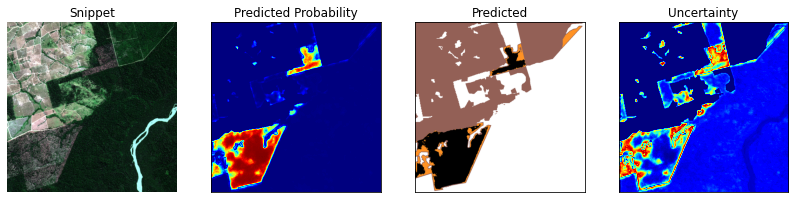

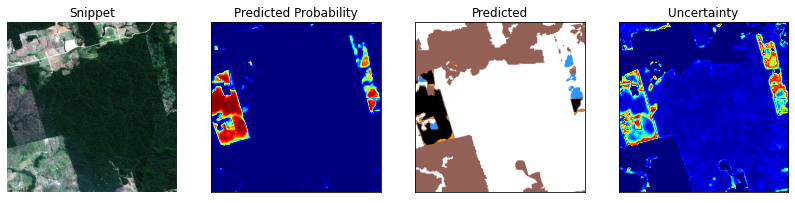

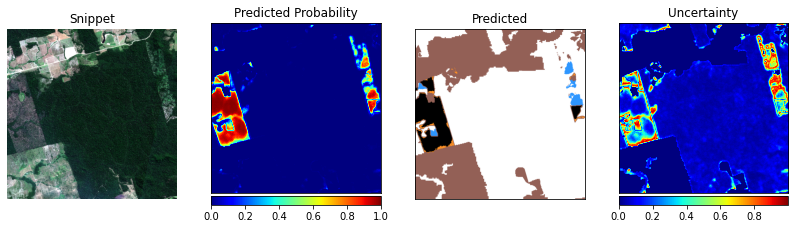

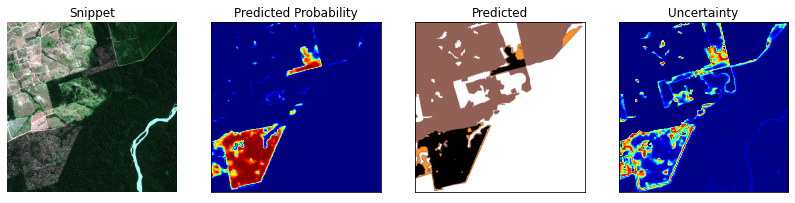

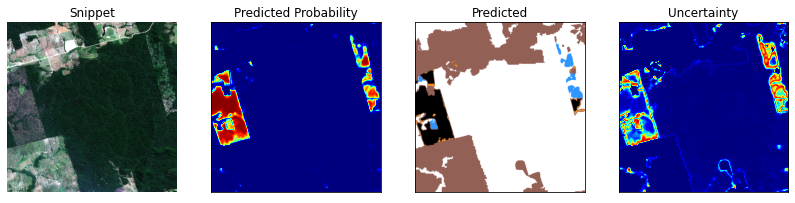

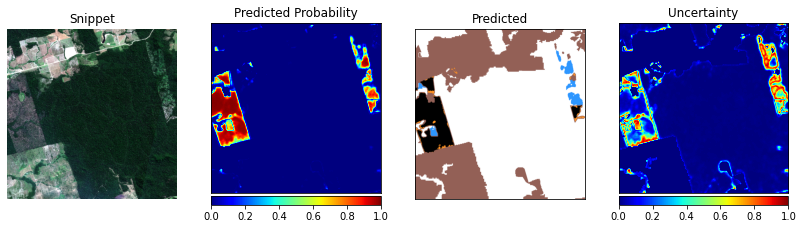

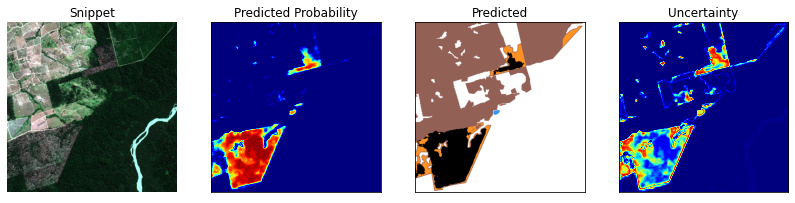

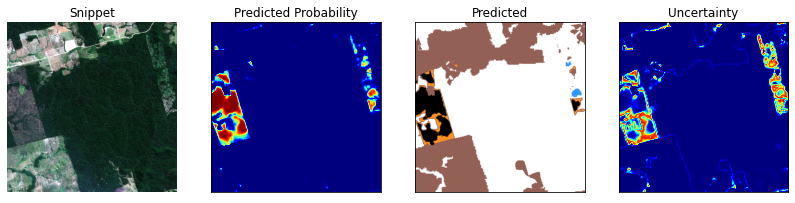

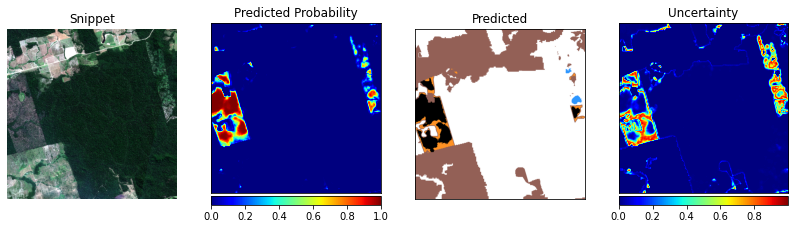

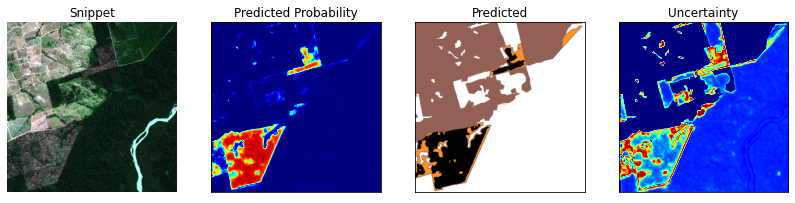

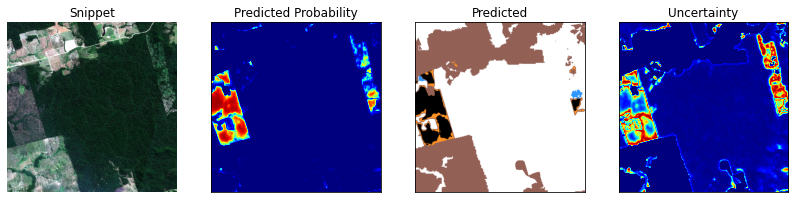

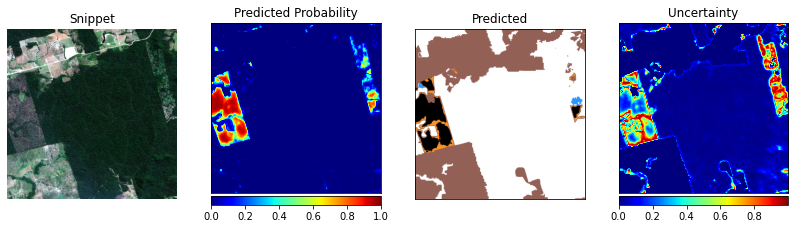

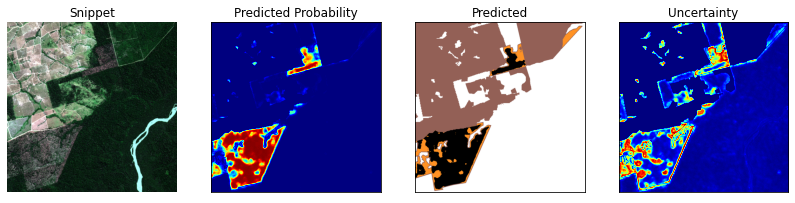

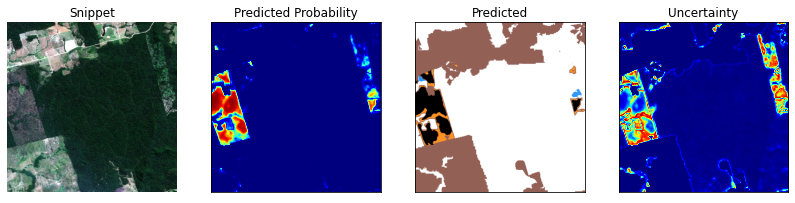

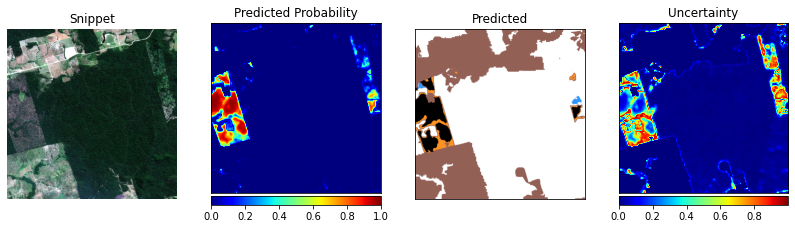

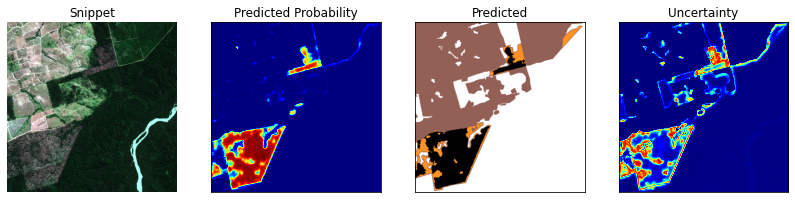

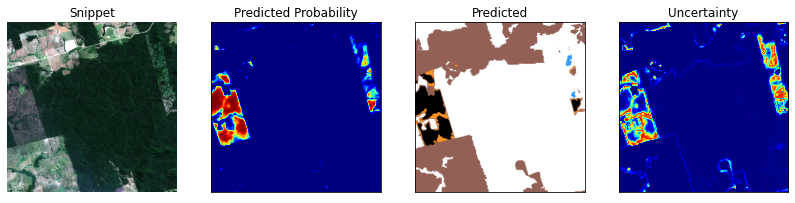

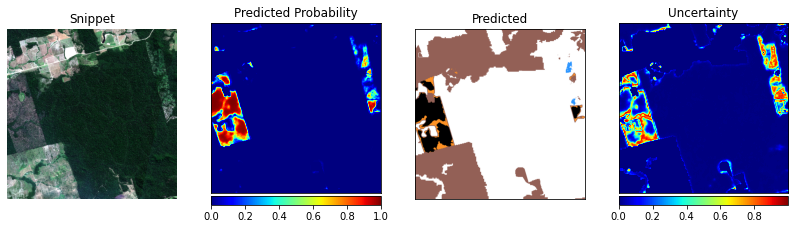

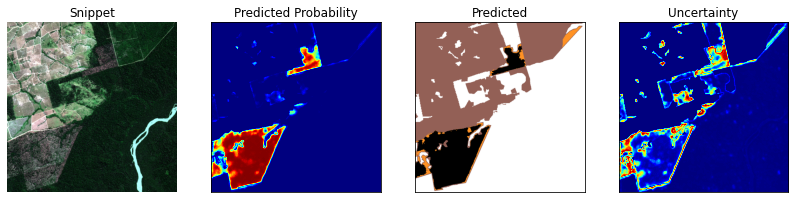

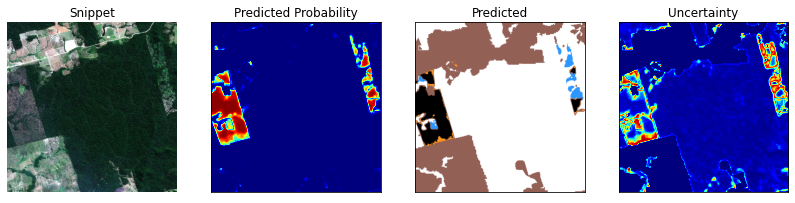

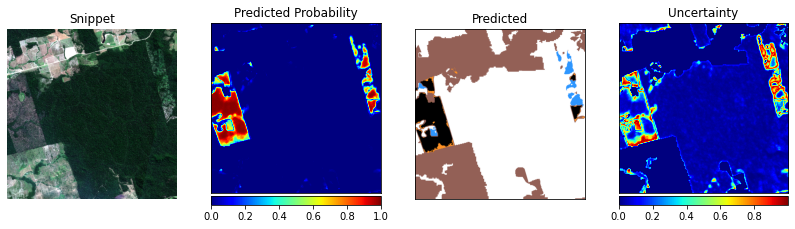

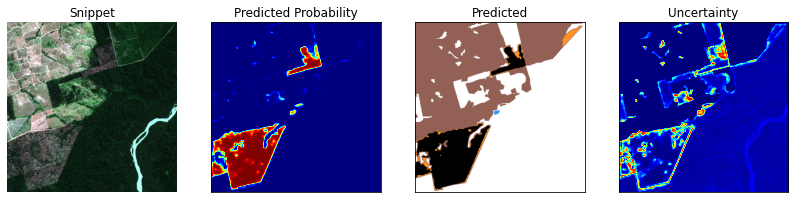

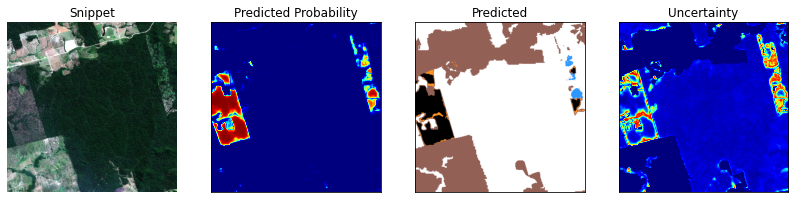

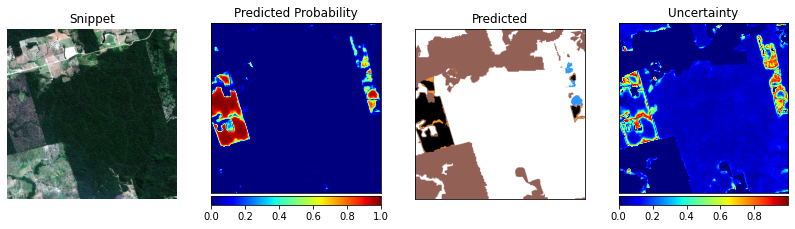

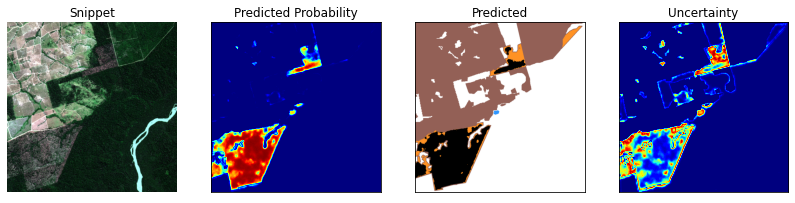

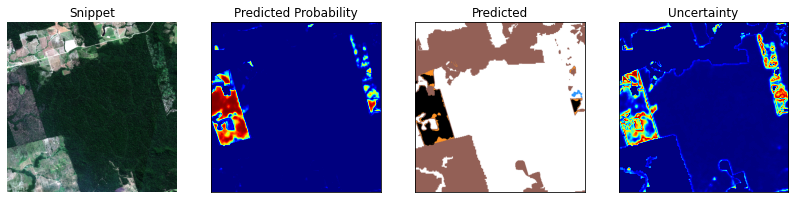

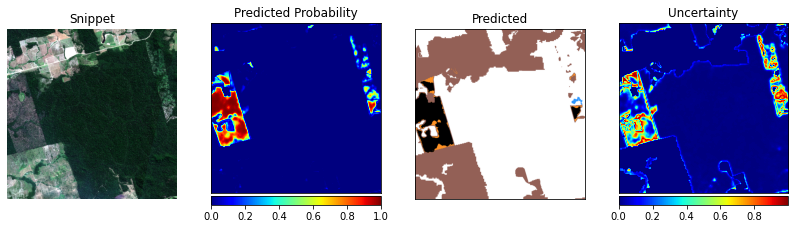

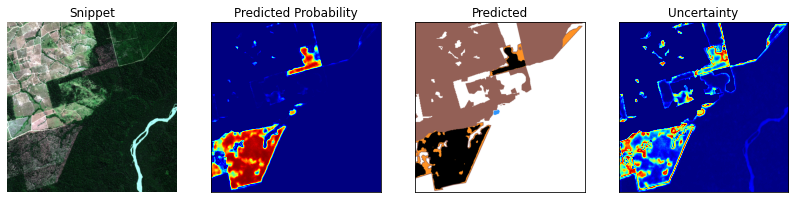

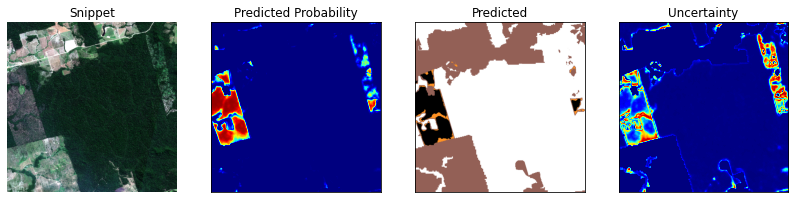

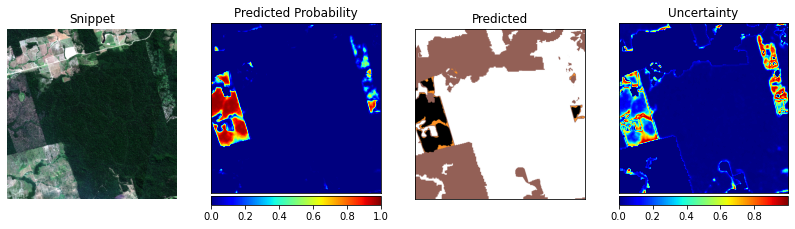

In [9]:
if inferring == True:
    idx = 0
    results = []
    error_count = 0

    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:

            print("Beginning run number {}".format(idx))
            logger = Logger()
            trainer = trainer_class(config, dataset, patchesHandler, logger)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            result = trainer.run_predictor()
            print("Result idx {}: {}".format(idx, result))
            results.append(result)


            with open(trainer.default_log_name, 'wb') as f:
                pickle.dump(results, f)
            print("Grid execution idx: {}".format(idx))
            idx += 1
            print("Grid execution idx: {}".format(idx))
            error_count = 0
        except Exception as e: 
            print(traceback.format_exc())
            error_count += 1
            if error_count > 10:
                sys.exit()
            print("Execution error in idx {}. Retrying...".format(idx))
            continue

In [10]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.3029247824884806, 'ece_score': 0.09552433998781638}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9848628e-01, 7.8104509e-05, 1.4356170e-03],
       [9.9914038e-01, 2.2534479e-05, 8.3706074e-04],
       [9.9947137e-01, 1.5073793e-05, 5.1349163e-04],
       [8.2492828e-01, 2.0535436e-02, 1.5453626e-01],
       [9.7475886e-01, 4.1679107e-03, 2.1073237e-02],
       [9.9273700e-01, 7.5765006e-04, 6.5053860e-03],
       [9.9461973e-01, 4.0858131e-04, 4.9717207e-03],
       [9.9732226e-01, 4.1932770e-04, 2.2584440e-03],
       [9.6950978e-01, 5.4349750e-03, 2.5055185e-02],
       [9.4953930e-01, 7.0097246e-03, 4.3450996e-02]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.5975916 , 0.23552155, 0.16688687],
       [0.73098993, 0.13218713, 0.13682286],
       [0.638014  , 0.20670359, 0.1552823 ],
       [0.4884835 , 0.30129033, 0.21022607],
     

In [11]:
print(len(results))

10


In [12]:
results[9]

{'other_uncertainty_metrics': {'sUEO': 0.4046725292290975,
  'ece_score': 0.046480175060111706},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': array([[9.99999762e-01, 1.31065048e-10, 2.94285485e-07],
          [9.99999046e-01, 2.32892489e-07, 6.86223586e-07],
          [9.97148573e-01, 3.77357064e-04, 2.47398345e-03],
          [9.99539971e-01, 1.57659561e-05, 4.44285892e-04],
          [9.99388576e-01, 1.94606746e-05, 5.92027442e-04],
          [9.99996901e-01, 4.80386255e-08, 3.07578898e-06],
          [9.99989033e-01, 1.57642390e-07, 1.07892565e-05],
          [9.99991536e-01, 4.33801205e-07, 7.94284279e-06],
          [9.99931216e-01, 1.77882691e-06, 6.70378940e-05],
          [9.90644932e-01, 8.45168065e-03, 9.03394306e-04]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': array([[0.5794552 , 0.18314642, 0.2373984 ],
          [0.58442205, 0.2367775 , 0.1788004 ],
          [0

In [13]:
trainer.f1

74.38

In [14]:
print(trainer.f1)

74.38
